In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
tc = pd.read_csv("C://Users/pchadha/Case_Study_Telecom_Churn/telecom_churn_data.csv")
#tc=pd.read_csv(r'C:\Users\regal\Desktop\Upgrad\Predictive analytics\Telecom Churn Case Study\telecom_churn_data.csv')

In [3]:
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth',5000)

In [464]:
tc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [465]:
tc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

There are total of 226 columns. 214 columns are numeric while 12 are object type. Will now analyse columns further 

In [466]:
tc.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [467]:
round((tc.isnull().sum()/len(tc.index))*100,2) 

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

We can see lot of columns with null values. However, since there are lot of columns we will split the columns into three lists, float, int and object type

In [4]:
cols = tc.select_dtypes(include=['int64']).columns.values
cols2 = tc.select_dtypes(include = ['float64']).columns.values
cols3 = tc.select_dtypes(exclude = ['float64','int64']).columns.values

In [469]:
round((tc[cols].isnull().sum()/len(tc.index))*100,2)

mobile_number         0.0
circle_id             0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
monthly_2g_6          0.0
monthly_2g_7          0.0
monthly_2g_8          0.0
monthly_2g_9          0.0
sachet_2g_6           0.0
sachet_2g_7           0.0
sachet_2g_8           0.0
sachet_2g_9           0.0
monthly_3g_6          0.0
monthly_3g_7          0.0
monthly_3g_8          0.0
monthly_3g_9          0.0
sachet_3g_6           0.0
sachet_3g_7           0.0
sachet_3g_8           0.0
sachet_3g_9           0.0
aon                   0.0
dtype: float64

We can see that the above list of columns do not have null values. We can filter the high value customers based on "total_rech_amt_*" column of the respective months. We can calculate this by considering such subscribers to have "total_rech_amt" to be more than or equal to 70% of average of "total_rech_amt" for months 6 and 7 respectively  

In [5]:
# defining high value customers
# first we will calculate the average recharge amount for first two months
tc['avg_rech']=(tc["total_rech_amt_6"] + tc["total_rech_amt_7"])/2# 


In [6]:
len(tc[tc['avg_rech'] > tc['avg_rech'].quantile(0.7)].index)

29979

In [7]:
tc1=tc[tc['avg_rech'] > tc['avg_rech'].quantile(0.7)]

In [9]:
len(tc1.index)

29979

In [8]:
tc1.index = pd.RangeIndex(1, len(tc1.index) + 1)

In [10]:
# Tagging churn based on 9th month usage
# columns we have to use are  total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
tc1[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
1,0.00,0.00,0.0,0.0
2,34.91,142.18,0.0,0.0
3,631.86,446.09,0.0,0.0
4,334.56,255.74,0.0,0.0
5,87.13,631.08,0.0,0.0


In [11]:
# Function for tagging churn
def f(x):
    if(x[0] == 0 and x[1] == 0 and x[2] == 0 and x[3] == 0):
        return 1
    else:
        return 0
    
        

In [12]:
tc1['churn'] = tc1[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(f,axis=1)

In [13]:
tc1[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
1,0.00,0.00,0.00,0.00,1
2,34.91,142.18,0.00,0.00,0
3,631.86,446.09,0.00,0.00,0
4,334.56,255.74,0.00,0.00,0
5,87.13,631.08,0.00,0.00,0
6,252.61,1031.53,0.00,0.00,0
7,330.03,627.78,0.00,0.00,0
8,114.16,1.70,30.92,5588.11,0
9,114.09,708.04,0.00,0.00,0
10,165.84,89.13,0.00,0.00,0


In [479]:
# since we have tagged all customers with churn indicator we can remove all the attribute of month 9 i.e churn phase 

In [14]:
coltoremove=[]
for i in tc1.columns:
    if i[-1] == '9':
        coltoremove.append(i)

In [15]:
tc1_new=tc1.drop(coltoremove,axis=1)

In [16]:
tc1_new.index = pd.RangeIndex(1, len(tc1_new.index) + 1)

In [17]:
#Estimating data imbalance for 'churn'
print(round((tc1_new.churn.value_counts()/len(tc1_new.index))*100,2))

0    91.36
1     8.64
Name: churn, dtype: float64


In [484]:
# It can be seen that data is heavily imbalanced as only 8% of subscribers seem to have churned based on 9th month data

In [18]:
cols = tc1_new.select_dtypes(include=['int64']).columns.values
cols2 = tc1_new.select_dtypes(include = ['float64']).columns.values
cols3 = tc1_new.select_dtypes(exclude = ['float64','int64']).columns.values

In [486]:
round((tc1_new[cols].isnull().sum()/len(tc1_new.index))*100,2)

mobile_number         0.0
circle_id             0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
monthly_2g_6          0.0
monthly_2g_7          0.0
monthly_2g_8          0.0
sachet_2g_6           0.0
sachet_2g_7           0.0
sachet_2g_8           0.0
monthly_3g_6          0.0
monthly_3g_7          0.0
monthly_3g_8          0.0
sachet_3g_6           0.0
sachet_3g_7           0.0
sachet_3g_8           0.0
aon                   0.0
churn                 0.0
dtype: float64

In [487]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
date_of_last_rech_6          0.21
date_of_last_rech_7          0.38
date_of_last_rech_8          1.98
date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.13
date_of_last_rech_data_8    60.84
dtype: float64


Most of the columns in the above list have null values and apart from "date_of_last_rech_data_" based columns, rest have quite a low percentage of null values.'last_date_of_month" can be imputed by respective known value.

In [488]:
tc1_new["last_date_of_month_6"].head()

1    6/30/2014
2    6/30/2014
3    6/30/2014
4    6/30/2014
5    6/30/2014
Name: last_date_of_month_6, dtype: object

In [489]:
tc1_new["last_date_of_month_7"].head()

1    7/31/2014
2    7/31/2014
3    7/31/2014
4    7/31/2014
5    7/31/2014
Name: last_date_of_month_7, dtype: object

In [490]:
tc1_new["last_date_of_month_8"].head()

1    8/31/2014
2    8/31/2014
3    8/31/2014
4    8/31/2014
5    8/31/2014
Name: last_date_of_month_8, dtype: object

In [19]:
#imputing 'last_date_of_month" columns with correct values
tc1_new.loc[pd.isnull(tc1_new["last_date_of_month_6"]), 'last_date_of_month_6'] = tc1_new.loc[1,'last_date_of_month_6']
tc1_new.loc[pd.isnull(tc1_new["last_date_of_month_7"]), 'last_date_of_month_7'] = tc1_new.loc[1,'last_date_of_month_7']
tc1_new.loc[pd.isnull(tc1_new["last_date_of_month_8"]), 'last_date_of_month_8'] = tc1_new.loc[1,'last_date_of_month_8']

In [492]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
date_of_last_rech_6          0.21
date_of_last_rech_7          0.38
date_of_last_rech_8          1.98
date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.13
date_of_last_rech_data_8    60.84
dtype: float64


In [493]:
tc1_new["date_of_last_rech_6"].value_counts()

6/30/2014    8715
6/29/2014    5579
6/28/2014    3713
6/27/2014    3241
6/26/2014    1837
6/25/2014    1312
6/24/2014    1077
6/23/2014     707
6/21/2014     586
6/22/2014     520
6/14/2014     467
6/20/2014     353
6/19/2014     350
6/17/2014     349
6/18/2014     301
6/16/2014     170
6/12/2014     128
6/13/2014     118
6/15/2014     116
6/11/2014      72
6/8/2014       42
6/7/2014       32
6/10/2014      29
6/5/2014       20
6/9/2014       19
6/3/2014       18
6/4/2014       15
6/2/2014       12
6/1/2014       11
6/6/2014        8
Name: date_of_last_rech_6, dtype: int64

Can't impute any specific date as there's no specific popular "last recharge date". Also the percentage is extremely low so better to remove the null rows 

In [20]:
tc1_new = tc1_new[~pd.isnull(tc1_new['date_of_last_rech_6'])]


In [21]:
tc1_new.index = pd.RangeIndex(1, len(tc1_new.index) + 1)

In [496]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
date_of_last_rech_6          0.00
date_of_last_rech_7          0.38
date_of_last_rech_8          1.95
date_of_last_rech_data_6    61.94
date_of_last_rech_data_7    61.11
date_of_last_rech_data_8    60.79
dtype: float64


In [497]:
tc1_new["date_of_last_rech_7"].value_counts()

7/31/2014    7902
7/30/2014    5340
7/29/2014    3470
7/28/2014    2857
7/25/2014    2114
7/27/2014    1729
7/26/2014    1656
7/24/2014     863
7/22/2014     607
7/23/2014     561
7/16/2014     398
7/21/2014     372
7/20/2014     360
7/15/2014     303
7/17/2014     279
7/19/2014     276
7/18/2014     213
7/14/2014      78
7/9/2014       70
7/10/2014      60
7/12/2014      54
7/13/2014      49
7/11/2014      45
7/7/2014       29
7/6/2014       27
7/8/2014       24
7/4/2014       21
7/3/2014       17
7/5/2014       12
7/1/2014       10
7/2/2014        7
Name: date_of_last_rech_7, dtype: int64

In [22]:
# Same as "6th" month case, so will remove the null values
tc1_new = tc1_new[~pd.isnull(tc1_new['date_of_last_rech_7'])]


In [23]:
tc1_new.index = pd.RangeIndex(1, len(tc1_new.index) + 1)

In [500]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
date_of_last_rech_6          0.00
date_of_last_rech_7          0.00
date_of_last_rech_8          1.74
date_of_last_rech_data_6    61.84
date_of_last_rech_data_7    60.96
date_of_last_rech_data_8    60.65
dtype: float64


In [501]:
tc1_new["date_of_last_rech_8"].value_counts()

8/31/2014    6651
8/30/2014    4776
8/29/2014    3360
8/28/2014    2932
8/25/2014    2199
8/26/2014    2048
8/27/2014    1852
8/24/2014    1171
8/23/2014     537
8/22/2014     513
8/20/2014     487
8/19/2014     425
8/21/2014     380
8/18/2014     237
8/15/2014     182
8/14/2014     178
8/16/2014     174
8/17/2014     169
8/5/2014      124
8/12/2014     116
8/13/2014     116
8/11/2014     113
8/9/2014      110
8/8/2014       88
8/6/2014       77
8/10/2014      72
8/7/2014       61
8/1/2014       47
8/2/2014       33
8/3/2014       29
8/4/2014       28
Name: date_of_last_rech_8, dtype: int64

In [502]:
# Again the same case though as this is the 'action' month, lets see the 'churn' values at these 'null' values
print(tc1_new.loc[pd.isnull(tc1_new["date_of_last_rech_8"]), "churn"].value_counts())

1    260
0    258
Name: churn, dtype: int64


In [503]:
# We can remove the null rows with churn as '0' since this will not impact the data distribution. However, its better to impute such rows with churn as '1' due to its low percentage 
print(tc1_new.loc[tc1_new["churn"] == 1, "date_of_last_rech_8"].value_counts())

8/26/2014    357
8/25/2014    305
8/28/2014    246
8/29/2014    243
8/24/2014    149
8/30/2014    111
8/31/2014    100
8/22/2014     97
8/19/2014     94
8/20/2014     71
8/27/2014     70
8/15/2014     42
8/23/2014     30
8/21/2014     30
8/5/2014      28
8/18/2014     27
8/11/2014     24
8/12/2014     24
8/14/2014     23
8/6/2014      23
8/9/2014      21
8/8/2014      20
8/17/2014     18
8/16/2014     17
8/13/2014     16
8/10/2014     16
8/1/2014      15
8/7/2014      13
8/2/2014       9
8/4/2014       7
8/3/2014       6
Name: date_of_last_rech_8, dtype: int64


In [24]:
#tc1_new.loc[tc1_new["churn"] == 1, "date_of_last_rech_8"].mode()
# Imputing highest frequency date in null rows where churn =1
dt = tc1_new.loc[tc1_new["churn"] == 1, "date_of_last_rech_8"].mode()
print(dt)
tc1_new.loc[(pd.isnull(tc1_new["date_of_last_rech_8"])) & (tc1_new.churn == 1),"date_of_last_rech_8"] = 8/26/2014 

0    8/26/2014
dtype: object


In [505]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
date_of_last_rech_6          0.00
date_of_last_rech_7          0.00
date_of_last_rech_8          0.87
date_of_last_rech_data_6    61.84
date_of_last_rech_data_7    60.96
date_of_last_rech_data_8    60.65
dtype: float64


In [506]:
tc1_new["date_of_last_rech_8"].value_counts()

8/31/2014                 6651
8/30/2014                 4776
8/29/2014                 3360
8/28/2014                 2932
8/25/2014                 2199
8/26/2014                 2048
8/27/2014                 1852
8/24/2014                 1171
8/23/2014                  537
8/22/2014                  513
8/20/2014                  487
8/19/2014                  425
8/21/2014                  380
0.00015277671682835536     260
8/18/2014                  237
8/15/2014                  182
8/14/2014                  178
8/16/2014                  174
8/17/2014                  169
8/5/2014                   124
8/12/2014                  116
8/13/2014                  116
8/11/2014                  113
8/9/2014                   110
8/8/2014                    88
8/6/2014                    77
8/10/2014                   72
8/7/2014                    61
8/1/2014                    47
8/2/2014                    33
8/3/2014                    29
8/4/2014                    28
Name: da

In [507]:
tc1_new["date_of_last_rech_8"].head()

1    8/26/2014
2    8/30/2014
3    8/30/2014
4    8/14/2014
5    8/25/2014
Name: date_of_last_rech_8, dtype: object

In [25]:
tc1_new.loc[tc1_new["date_of_last_rech_8"] == 0.00015277671682835536, "date_of_last_rech_8"] = tc1_new.loc[1, "date_of_last_rech_8"]

In [26]:
tc1_new["date_of_last_rech_8"].value_counts()

8/31/2014    6651
8/30/2014    4776
8/29/2014    3360
8/28/2014    2932
8/26/2014    2308
8/25/2014    2199
8/27/2014    1852
8/24/2014    1171
8/23/2014     537
8/22/2014     513
8/20/2014     487
8/19/2014     425
8/21/2014     380
8/18/2014     237
8/15/2014     182
8/14/2014     178
8/16/2014     174
8/17/2014     169
8/5/2014      124
8/13/2014     116
8/12/2014     116
8/11/2014     113
8/9/2014      110
8/8/2014       88
8/6/2014       77
8/10/2014      72
8/7/2014       61
8/1/2014       47
8/2/2014       33
8/3/2014       29
8/4/2014       28
Name: date_of_last_rech_8, dtype: int64

In [27]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
date_of_last_rech_6          0.00
date_of_last_rech_7          0.00
date_of_last_rech_8          0.87
date_of_last_rech_data_6    61.84
date_of_last_rech_data_7    60.96
date_of_last_rech_data_8    60.65
dtype: float64


In [28]:
#removing the null values now
tc1_new = tc1_new[~pd.isnull(tc1_new['date_of_last_rech_8'])]

In [29]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
date_of_last_rech_6          0.00
date_of_last_rech_7          0.00
date_of_last_rech_8          0.00
date_of_last_rech_data_6    61.70
date_of_last_rech_data_7    60.79
date_of_last_rech_data_8    60.30
dtype: float64


In [38]:
tc1_new.index = pd.RangeIndex(1, len(tc1_new.index) + 1)

In [514]:
tc1_new["date_of_last_rech_data_6"].head()

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: date_of_last_rech_data_6, dtype: object

In [515]:
tc1_new["last_date_of_month_6"].head()

1    6/30/2014
2    6/30/2014
3    6/30/2014
4    6/30/2014
5    6/30/2014
Name: last_date_of_month_6, dtype: object

In [516]:
#Checking for data consistency
tc1_new["last_date_of_month_6"].value_counts()

6/30/2014    29545
Name: last_date_of_month_6, dtype: int64

In [517]:
#Checking for data consistency
tc1_new["last_date_of_month_7"].value_counts()

7/31/2014    29545
Name: last_date_of_month_7, dtype: int64

In [518]:
#Checking for data consistency
tc1_new["last_date_of_month_8"].value_counts()

8/31/2014    29545
Name: last_date_of_month_8, dtype: int64

In [519]:
tc1_new["date_of_last_rech_6"].head()

1    6/27/2014
2    6/25/2014
3    6/20/2014
4    6/30/2014
5    6/30/2014
Name: date_of_last_rech_6, dtype: object

In [520]:
tc1_new["date_of_last_rech_7"].head()

1    7/25/2014
2    7/31/2014
3    7/22/2014
4    7/31/2014
5    7/30/2014
Name: date_of_last_rech_7, dtype: object

In [521]:
tc1_new["date_of_last_rech_8"].head()

1    8/26/2014
2    8/30/2014
3    8/30/2014
4    8/14/2014
5    8/25/2014
Name: date_of_last_rech_8, dtype: object

In [522]:
tc1_new["last_day_rch_amt_6"].head()

1      0
2     50
3    110
4    100
5     30
Name: last_day_rch_amt_6, dtype: int64

In [30]:
col4 = tc1_new.columns[tc1_new.isnull().any()].tolist()

In [39]:
tc1_new[col4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29545 entries, 1 to 29545
Columns: 117 entries, loc_og_t2o_mou to fb_user_8
dtypes: float64(117)
memory usage: 26.4 MB


Since we have the details of last recharge for complete data now and for every month in the form of 'date_of_last_rech_", we can remove the columns "date_of_last_rech_data_" for all months as the missing percentage is above 70%. This could also mean that customers mostly recharge using composite packs rather than data specific packs. Therefore, removing these columns   

In [32]:
# removing "date_of_last_rech_data_" columns
tc1_new = tc1_new.drop("date_of_last_rech_data_6", axis = 1)
tc1_new = tc1_new.drop("date_of_last_rech_data_7", axis = 1)
tc1_new = tc1_new.drop("date_of_last_rech_data_8", axis = 1)

In [33]:
cols3 = tc1_new.select_dtypes(exclude = ['float64','int64']).columns.values

In [527]:
print(round((tc1_new[cols3].isnull().sum()/len(tc1_new.index))*100,2))

last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
date_of_last_rech_6     0.0
date_of_last_rech_7     0.0
date_of_last_rech_8     0.0
dtype: float64


In [34]:
# Converting the columns "last_date_of_month_*" and "date_of_last_rech_*" to 'datetime'
import datetime as dt
tc1_new["last_date_of_month_6"] = pd.to_datetime(tc1_new["last_date_of_month_6"], format='%m/%d/%Y')
tc1_new["last_date_of_month_7"] = pd.to_datetime(tc1_new["last_date_of_month_7"], format='%m/%d/%Y')
tc1_new["last_date_of_month_8"] = pd.to_datetime(tc1_new["last_date_of_month_8"], format='%m/%d/%Y')
tc1_new["date_of_last_rech_6"] = pd.to_datetime(tc1_new["date_of_last_rech_6"], format='%m/%d/%Y')
tc1_new["date_of_last_rech_7"] = pd.to_datetime(tc1_new["date_of_last_rech_7"], format='%m/%d/%Y')
tc1_new["date_of_last_rech_8"] = pd.to_datetime(tc1_new["date_of_last_rech_8"], format='%m/%d/%Y')

In [35]:
# Deriving feature, 'diff', which would be difference, in days, between the last date of month and the last date of recharge. This would indicate how close to the month end do respective subscribers recharge 
tc1_new["diff_06"] = tc1_new["last_date_of_month_6"] - tc1_new["date_of_last_rech_6"]
tc1_new["diff_07"] = tc1_new["last_date_of_month_7"] - tc1_new["date_of_last_rech_7"]
tc1_new["diff_08"] = tc1_new["last_date_of_month_8"] - tc1_new["date_of_last_rech_8"]

### We can remove the "last_date_of_month_*" columns as per my understanding. If you too feel the same, please remove these columns. We can discuss the same

Evaluating the "cols2", float datatype, columns now

In [36]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [40]:
tc1_new[col4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29545 entries, 1 to 29545
Columns: 117 entries, loc_og_t2o_mou to fb_user_8
dtypes: float64(117)
memory usage: 26.4 MB


In [532]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

loc_og_t2o_mou         0.32
std_og_t2o_mou         0.32
loc_ic_t2o_mou         0.32
onnet_mou_6            0.90
onnet_mou_7            0.86
onnet_mou_8            2.93
offnet_mou_6           0.90
offnet_mou_7           0.86
offnet_mou_8           2.93
roam_ic_mou_6          0.90
roam_ic_mou_7          0.86
roam_ic_mou_8          2.93
roam_og_mou_6          0.90
roam_og_mou_7          0.86
roam_og_mou_8          2.93
loc_og_t2t_mou_6       0.90
loc_og_t2t_mou_7       0.86
loc_og_t2t_mou_8       2.93
loc_og_t2m_mou_6       0.90
loc_og_t2m_mou_7       0.86
loc_og_t2m_mou_8       2.93
loc_og_t2f_mou_6       0.90
loc_og_t2f_mou_7       0.86
loc_og_t2f_mou_8       2.93
loc_og_t2c_mou_6       0.90
loc_og_t2c_mou_7       0.86
loc_og_t2c_mou_8       2.93
loc_og_mou_6           0.90
loc_og_mou_7           0.86
loc_og_mou_8           2.93
std_og_t2t_mou_6       0.90
std_og_t2t_mou_7       0.86
std_og_t2t_mou_8       2.93
std_og_t2m_mou_6       0.90
std_og_t2m_mou_7       0.86
std_og_t2m_mou_8    

In [41]:
# Will remove null rows for columns that have null value percentage equal or less than 1% as imputing 
# any value for such columns will not make any substantial difference
for i in col4:
    if round((tc1_new[i].isnull().sum()/len(tc1_new.index))*100,2) <= 1:
        tc1_new = tc1_new[~pd.isnull(tc1_new[i])]


In [42]:
tc1_new.index = pd.RangeIndex(1, len(tc1_new.index) + 1)

In [43]:
print(round((tc1_new.churn.value_counts()/len(tc1_new.index))*100,2))

0    91.94
1     8.06
Name: churn, dtype: float64


In [44]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [537]:
print(round((tc1_new.churn.value_counts()/len(tc1_new.index))*100,2))

0    91.94
1     8.06
Name: churn, dtype: float64


In [538]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

onnet_mou_8            2.22
offnet_mou_8           2.22
roam_ic_mou_8          2.22
roam_og_mou_8          2.22
loc_og_t2t_mou_8       2.22
loc_og_t2m_mou_8       2.22
loc_og_t2f_mou_8       2.22
loc_og_t2c_mou_8       2.22
loc_og_mou_8           2.22
std_og_t2t_mou_8       2.22
std_og_t2m_mou_8       2.22
std_og_t2f_mou_8       2.22
std_og_t2c_mou_8       2.22
std_og_mou_8           2.22
isd_og_mou_8           2.22
spl_og_mou_8           2.22
og_others_8            2.22
loc_ic_t2t_mou_8       2.22
loc_ic_t2m_mou_8       2.22
loc_ic_t2f_mou_8       2.22
loc_ic_mou_8           2.22
std_ic_t2t_mou_8       2.22
std_ic_t2m_mou_8       2.22
std_ic_t2f_mou_8       2.22
std_ic_t2o_mou_8       2.22
std_ic_mou_8           2.22
spl_ic_mou_8           2.22
isd_ic_mou_8           2.22
ic_others_8            2.22
total_rech_data_6     61.80
total_rech_data_7     60.93
total_rech_data_8     60.34
max_rech_data_6       61.80
max_rech_data_7       60.93
max_rech_data_8       60.34
count_rech_2g_6     

In [539]:
print(tc1_new.loc[pd.isnull(tc1_new["onnet_mou_8"]), "churn"].value_counts())

1    557
0     90
Name: churn, dtype: int64


In [540]:
print(tc1_new.loc[pd.isnull(tc1_new["offnet_mou_8"]), "churn"].value_counts())

1    557
0     90
Name: churn, dtype: int64


In [541]:
print(tc1_new.loc[pd.isnull(tc1_new["std_og_t2t_mou_8"]), "churn"].value_counts())

1    557
0     90
Name: churn, dtype: int64


It can be seen from above that the columns with '2.22' percentage of null values all are the same rows with same distribution of 'churn' values. Again, they have high percentage of churn value of '1' so removing these null values is not a good idea

In [542]:
tc1_new["onnet_mou_8"].value_counts()

0.00       982
0.66        13
0.63        13
0.43        12
0.03        12
1.48        11
0.83        10
0.55        10
0.48        10
6.73        10
0.65        10
1.01        10
8.21        10
0.88        10
12.09       10
17.43       10
2.23        10
4.98        10
0.06         9
0.58         9
1.06         9
4.36         9
14.96        9
0.56         9
1.33         9
30.41        9
24.41        9
0.76         8
1.03         8
53.56        8
0.61         8
11.36        8
2.96         8
18.61        8
49.61        8
20.08        8
9.36         8
21.59        8
5.33         8
1.46         8
4.94         8
6.11         8
15.89        8
3.96         8
1.26         8
46.91        8
18.54        8
0.33         8
0.93         8
2.46         8
0.28         7
11.53        7
25.83        7
8.61         7
8.89         7
2.99         7
21.49        7
8.38         7
30.73        7
0.53         7
5.79         7
8.48         7
35.58        7
8.26         7
10.93        7
6.79         7
9.29      

In [543]:
tc1_new["og_others_8"].value_counts()

0.00      28324
0.16          7
2.26          4
0.01          4
0.30          4
0.05          3
0.78          3
0.11          3
0.48          3
0.21          3
0.63          3
1.03          3
0.26          2
0.51          2
0.08          2
0.66          2
0.23          2
0.35          2
1.65          2
6.93          2
0.81          2
0.06          2
0.40          2
1.70          2
0.18          2
1.68          2
0.38          2
394.93        1
0.03          1
2.33          1
6.16          1
3.16          1
0.39          1
1.20          1
1.73          1
24.29         1
13.59         1
4.58          1
0.28          1
0.46          1
43.76         1
16.63         1
2.68          1
0.98          1
0.15          1
3.88          1
16.45         1
0.50          1
0.25          1
1.00          1
0.43          1
37.21         1
134.88        1
3.33          1
39.76         1
1.08          1
1.76          1
350.83        1
4.65          1
0.88          1
4.61          1
2.04          1
2.51    

Since these columns relate to minutes of usage 'MOU' for different categories for month-8, we can impute such null rows for churn '1' with value '0' as these subscribers have churned in 9th month so mostly likely, used the services to minimum or most likely '0' minutes 

In [45]:
for i in col4:
    if round((tc1_new[i].isnull().sum()/len(tc1_new.index))*100,2) == 2.22:
        tc1_new.loc[(pd.isnull(tc1_new[i])) & (tc1_new.churn == 1),i] = 0


In [46]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

onnet_mou_8            0.31
offnet_mou_8           0.31
roam_ic_mou_8          0.31
roam_og_mou_8          0.31
loc_og_t2t_mou_8       0.31
loc_og_t2m_mou_8       0.31
loc_og_t2f_mou_8       0.31
loc_og_t2c_mou_8       0.31
loc_og_mou_8           0.31
std_og_t2t_mou_8       0.31
std_og_t2m_mou_8       0.31
std_og_t2f_mou_8       0.31
std_og_t2c_mou_8       0.31
std_og_mou_8           0.31
isd_og_mou_8           0.31
spl_og_mou_8           0.31
og_others_8            0.31
loc_ic_t2t_mou_8       0.31
loc_ic_t2m_mou_8       0.31
loc_ic_t2f_mou_8       0.31
loc_ic_mou_8           0.31
std_ic_t2t_mou_8       0.31
std_ic_t2m_mou_8       0.31
std_ic_t2f_mou_8       0.31
std_ic_t2o_mou_8       0.31
std_ic_mou_8           0.31
spl_ic_mou_8           0.31
isd_ic_mou_8           0.31
ic_others_8            0.31
total_rech_data_6     61.80
total_rech_data_7     60.93
total_rech_data_8     60.34
max_rech_data_6       61.80
max_rech_data_7       60.93
max_rech_data_8       60.34
count_rech_2g_6     

In [47]:
print(tc1_new.loc[pd.isnull(tc1_new["std_og_t2t_mou_8"]), "churn"].value_counts())

0    90
Name: churn, dtype: int64


In [48]:
# Will now remove the null values for these columns as only churn '0' null rows are left which can be removed without much impact
for i in col4:
    if round((tc1_new[i].isnull().sum()/len(tc1_new.index))*100,2) == 0.31:
        tc1_new = tc1_new[~pd.isnull(tc1_new[i])]


In [548]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

onnet_mou_8            0.00
offnet_mou_8           0.00
roam_ic_mou_8          0.00
roam_og_mou_8          0.00
loc_og_t2t_mou_8       0.00
loc_og_t2m_mou_8       0.00
loc_og_t2f_mou_8       0.00
loc_og_t2c_mou_8       0.00
loc_og_mou_8           0.00
std_og_t2t_mou_8       0.00
std_og_t2m_mou_8       0.00
std_og_t2f_mou_8       0.00
std_og_t2c_mou_8       0.00
std_og_mou_8           0.00
isd_og_mou_8           0.00
spl_og_mou_8           0.00
og_others_8            0.00
loc_ic_t2t_mou_8       0.00
loc_ic_t2m_mou_8       0.00
loc_ic_t2f_mou_8       0.00
loc_ic_mou_8           0.00
std_ic_t2t_mou_8       0.00
std_ic_t2m_mou_8       0.00
std_ic_t2f_mou_8       0.00
std_ic_t2o_mou_8       0.00
std_ic_mou_8           0.00
spl_ic_mou_8           0.00
isd_ic_mou_8           0.00
ic_others_8            0.00
total_rech_data_6     61.80
total_rech_data_7     60.91
total_rech_data_8     60.28
max_rech_data_6       61.80
max_rech_data_7       60.91
max_rech_data_8       60.28
count_rech_2g_6     

In [49]:
tc1_new.index = pd.RangeIndex(1, len(tc1_new.index) + 1)

In [50]:
print(round((tc1_new.churn.value_counts()/len(tc1_new.index))*100,2))

0    91.92
1     8.08
Name: churn, dtype: float64


In [51]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [552]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

total_rech_data_6     61.80
total_rech_data_7     60.91
total_rech_data_8     60.28
max_rech_data_6       61.80
max_rech_data_7       60.91
max_rech_data_8       60.28
count_rech_2g_6       61.80
count_rech_2g_7       60.91
count_rech_2g_8       60.28
count_rech_3g_6       61.80
count_rech_3g_7       60.91
count_rech_3g_8       60.28
av_rech_amt_data_6    61.80
av_rech_amt_data_7    60.91
av_rech_amt_data_8    60.28
arpu_3g_6             61.80
arpu_3g_7             60.91
arpu_3g_8             60.28
arpu_2g_6             61.80
arpu_2g_7             60.91
arpu_2g_8             60.28
night_pck_user_6      61.80
night_pck_user_7      60.91
night_pck_user_8      60.28
fb_user_6             61.80
fb_user_7             60.91
fb_user_8             60.28
dtype: float64


In [553]:
tc1_new["total_rech_data_6"].value_counts()

1.0     5597
2.0     2493
3.0     1071
4.0      639
5.0      359
6.0      227
7.0      166
8.0      114
9.0       87
10.0      79
12.0      52
11.0      43
13.0      27
14.0      21
17.0      19
15.0      17
18.0      12
16.0      12
20.0       9
19.0       9
22.0       8
24.0       6
21.0       4
25.0       4
26.0       3
23.0       3
32.0       3
40.0       3
29.0       2
28.0       2
35.0       2
55.0       1
27.0       1
34.0       1
33.0       1
61.0       1
Name: total_rech_data_6, dtype: int64

In [554]:
tc1_new["total_rech_data_7"].value_counts()

1.0     5352
2.0     2478
3.0     1057
4.0      713
5.0      492
6.0      344
7.0      222
8.0      178
9.0      107
10.0      94
11.0      75
12.0      50
14.0      31
13.0      25
16.0      24
15.0      21
17.0      12
19.0      11
20.0      10
24.0       8
18.0       6
26.0       6
21.0       5
22.0       5
25.0       4
23.0       4
31.0       3
30.0       3
43.0       2
35.0       2
48.0       2
32.0       2
40.0       2
29.0       2
27.0       2
42.0       1
54.0       1
50.0       1
37.0       1
39.0       1
Name: total_rech_data_7, dtype: int64

In [555]:
tc1_new["total_rech_data_8"].value_counts()

1.0     5660
2.0     2359
3.0     1042
4.0      760
5.0      519
6.0      372
7.0      202
8.0      153
9.0      110
10.0      82
11.0      56
12.0      41
13.0      28
14.0      25
15.0      23
16.0      19
18.0      15
17.0      12
22.0       7
20.0       6
23.0       6
21.0       5
19.0       4
24.0       3
30.0       3
25.0       3
29.0       2
42.0       2
34.0       2
26.0       2
46.0       2
28.0       2
44.0       2
40.0       2
55.0       1
60.0       1
33.0       1
32.0       1
49.0       1
38.0       1
48.0       1
50.0       1
27.0       1
57.0       1
39.0       1
Name: total_rech_data_8, dtype: int64

In [556]:
col5 = ["churn","total_rech_data_6"]

In [557]:
tc1_new[col5].corr()

,churn,total_rech_data_6
churn,1.000000,0.020607
total_rech_data_6,0.020607,1.000000


In [558]:
col5 = ["churn","total_rech_data_7"]

In [559]:
tc1_new[col5].corr()

,churn,total_rech_data_7
churn,1.000000,0.018819
total_rech_data_7,0.018819,1.000000


In [560]:
col5 = ["churn","total_rech_data_8"]

In [561]:
tc1_new[col5].corr()

,churn,total_rech_data_8
churn,1.000000,-0.026921
total_rech_data_8,-0.026921,1.000000


In [52]:
# Dropping the "total_rech_data" columns for all months as the percentage of null values is above 60%, there's no specific dominating value and there's not much correlation with target variable and we have large list of columns for variance
tc1_new = tc1_new.drop('total_rech_data_6', axis = 1)
tc1_new = tc1_new.drop('total_rech_data_7', axis = 1)
tc1_new = tc1_new.drop('total_rech_data_8', axis = 1)

In [53]:
cols = tc1_new.select_dtypes(include=['int64']).columns.values
cols2 = tc1_new.select_dtypes(include = ['float64']).columns.values
cols3 = tc1_new.select_dtypes(exclude = ['float64','int64']).columns.values

In [54]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [565]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

max_rech_data_6       61.80
max_rech_data_7       60.91
max_rech_data_8       60.28
count_rech_2g_6       61.80
count_rech_2g_7       60.91
count_rech_2g_8       60.28
count_rech_3g_6       61.80
count_rech_3g_7       60.91
count_rech_3g_8       60.28
av_rech_amt_data_6    61.80
av_rech_amt_data_7    60.91
av_rech_amt_data_8    60.28
arpu_3g_6             61.80
arpu_3g_7             60.91
arpu_3g_8             60.28
arpu_2g_6             61.80
arpu_2g_7             60.91
arpu_2g_8             60.28
night_pck_user_6      61.80
night_pck_user_7      60.91
night_pck_user_8      60.28
fb_user_6             61.80
fb_user_7             60.91
fb_user_8             60.28
dtype: float64


In [566]:
tc1_new["max_rech_data_6"].describe()

count    11098.000000
mean       144.983871
std        113.710600
min          1.000000
25%         33.000000
50%        154.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [567]:
tc1_new["max_rech_data_6"].value_counts()

154.0     2224
252.0     2095
25.0      1369
23.0       749
198.0      642
98.0       561
145.0      465
152.0      422
17.0       305
179.0      290
41.0       236
91.0       234
14.0       147
46.0       140
455.0      128
56.0       119
177.0      116
33.0       113
274.0      104
49.0        98
202.0       88
149.0       76
125.0       62
655.0       62
8.0         60
505.0       49
449.0       19
29.0        18
951.0       16
101.0       16
755.0       14
1.0         12
13.0         8
22.0         7
855.0        7
52.0         5
5.0          5
15.0         4
1555.0       3
1255.0       3
48.0         3
61.0         2
9.0          2
Name: max_rech_data_6, dtype: int64

In [568]:
col5 = ["churn","max_rech_data_6"]

In [569]:
tc1_new[col5].corr()

,churn,max_rech_data_6
churn,1.000000,-0.046123
max_rech_data_6,-0.046123,1.000000


In [570]:
tc1_new["max_rech_data_7"].value_counts()

252.0     2179
154.0     2171
25.0      1376
23.0       866
198.0      773
98.0       572
145.0      442
152.0      394
17.0       361
179.0      297
91.0       207
41.0       204
46.0       162
455.0      159
33.0       136
274.0      112
56.0       112
177.0      109
49.0       101
202.0       83
149.0       78
655.0       74
14.0        65
8.0         65
125.0       57
48.0        34
505.0       30
449.0       20
101.0       18
951.0       17
1.0         16
29.0        15
755.0       13
5.0          9
855.0        7
1255.0       5
9.0          4
1555.0       3
13.0         3
52.0         3
61.0         3
995.0        1
675.0        1
22.0         1
15.0         1
Name: max_rech_data_7, dtype: int64

In [571]:
col5 = ["churn","max_rech_data_7"]

In [572]:
tc1_new[col5].corr()

,churn,max_rech_data_7
churn,1.000000,-0.043708
max_rech_data_7,-0.043708,1.000000


In [573]:
tc1_new["max_rech_data_8"].value_counts()

252.0     2059
154.0     1770
25.0      1608
23.0      1491
198.0      735
98.0       524
145.0      405
179.0      377
17.0       372
152.0      327
455.0      197
41.0       191
175.0      186
91.0       177
46.0       176
56.0       112
274.0       90
33.0        79
49.0        79
202.0       71
655.0       70
164.0       68
8.0         61
14.0        51
48.0        38
29.0        27
125.0       25
449.0       25
149.0       25
248.0       19
951.0       17
505.0       15
755.0       14
1.0          9
13.0         9
177.0        8
101.0        8
22.0         6
855.0        5
5.0          4
52.0         4
1555.0       3
1505.0       1
61.0         1
1255.0       1
15.0         1
495.0        1
Name: max_rech_data_8, dtype: int64

In [574]:
col5 = ["churn","max_rech_data_8"]

In [575]:
tc1_new[col5].corr()

,churn,max_rech_data_8
churn,1.000000,-0.073668
max_rech_data_8,-0.073668,1.000000


In [55]:
# Dropping the "max_rech_data" columns for all months as well as again, the percentage of null values is above 60%, there's no specific dominating value and there's not much correlation with target variable and we have large list of columns for variance
tc1_new = tc1_new.drop('max_rech_data_6', axis = 1)
tc1_new = tc1_new.drop('max_rech_data_7', axis = 1)
tc1_new = tc1_new.drop('max_rech_data_8', axis = 1)

In [56]:
cols = tc1_new.select_dtypes(include=['int64']).columns.values
cols2 = tc1_new.select_dtypes(include = ['float64']).columns.values
cols3 = tc1_new.select_dtypes(exclude = ['float64','int64']).columns.values

In [57]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [58]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

count_rech_2g_6       61.80
count_rech_2g_7       60.91
count_rech_2g_8       60.28
count_rech_3g_6       61.80
count_rech_3g_7       60.91
count_rech_3g_8       60.28
av_rech_amt_data_6    61.80
av_rech_amt_data_7    60.91
av_rech_amt_data_8    60.28
arpu_3g_6             61.80
arpu_3g_7             60.91
arpu_3g_8             60.28
arpu_2g_6             61.80
arpu_2g_7             60.91
arpu_2g_8             60.28
night_pck_user_6      61.80
night_pck_user_7      60.91
night_pck_user_8      60.28
fb_user_6             61.80
fb_user_7             60.91
fb_user_8             60.28
dtype: float64


In [580]:
tc1_new["count_rech_2g_6"].value_counts()

1.0     4513
0.0     3156
2.0     1440
3.0      674
4.0      418
5.0      233
6.0      161
7.0      116
8.0       81
9.0       71
10.0      55
12.0      44
11.0      33
14.0      17
13.0      16
17.0      12
15.0      12
18.0       9
19.0       8
16.0       7
22.0       4
20.0       4
25.0       3
24.0       3
21.0       3
32.0       1
34.0       1
39.0       1
28.0       1
30.0       1
Name: count_rech_2g_6, dtype: int64

In [581]:
col5 = ["churn","count_rech_2g_6","count_rech_3g_6"]

In [582]:
tc1_new[col5].corr()

,churn,count_rech_2g_6,count_rech_3g_6
churn,1.000000,0.017815,0.010347
count_rech_2g_6,0.017815,1.000000,-0.002512
count_rech_3g_6,0.010347,-0.002512,1.000000


In [583]:
tc1_new["count_rech_2g_7"].value_counts()

1.0     4293
0.0     3160
2.0     1468
3.0      672
4.0      472
5.0      387
6.0      257
7.0      171
8.0      133
10.0      74
9.0       66
11.0      50
12.0      30
14.0      23
13.0      21
15.0      15
16.0      12
18.0      10
19.0       8
17.0       8
20.0       7
27.0       3
21.0       3
26.0       3
22.0       2
23.0       2
32.0       1
24.0       1
48.0       1
30.0       1
25.0       1
43.0       1
29.0       1
31.0       1
35.0       1
Name: count_rech_2g_7, dtype: int64

In [584]:
col5 = ["churn","count_rech_2g_7","count_rech_3g_7"]

In [585]:
tc1_new[col5].corr()

,churn,count_rech_2g_7,count_rech_3g_7
churn,1.000000,0.016581,0.008890
count_rech_2g_7,0.016581,1.000000,-0.006374
count_rech_3g_7,0.008890,-0.006374,1.000000


In [586]:
tc1_new["count_rech_2g_8"].value_counts()

1.0     4612
0.0     3009
2.0     1343
3.0      718
4.0      566
5.0      439
6.0      289
7.0      149
8.0      102
9.0       82
10.0      48
11.0      37
12.0      34
14.0      23
13.0      17
15.0      16
16.0      14
17.0       7
19.0       7
18.0       7
20.0       4
27.0       3
24.0       2
29.0       2
22.0       2
34.0       2
21.0       2
32.0       1
44.0       1
33.0       1
25.0       1
23.0       1
31.0       1
Name: count_rech_2g_8, dtype: int64

In [587]:
col5 = ["churn","count_rech_2g_8","count_rech_3g_8"]

In [588]:
tc1_new[col5].corr()

,churn,count_rech_2g_8,count_rech_3g_8
churn,1.000000,-0.014702,-0.028061
count_rech_2g_8,-0.014702,1.000000,0.071119
count_rech_3g_8,-0.028061,0.071119,1.000000


In [59]:
# Dropping the "count_rech_2g" and "count_rech_3g" columns for all months as well as again, the percentage of null values is above 60%, there's no specific dominating value and there's not much correlation with target variable and we have large list of columns for variance
tc1_new = tc1_new.drop(['count_rech_2g_6','count_rech_3g_6'], axis = 1)
tc1_new = tc1_new.drop(['count_rech_2g_7','count_rech_3g_7'], axis = 1)
tc1_new = tc1_new.drop(['count_rech_2g_8','count_rech_3g_8'], axis = 1)

In [60]:
cols = tc1_new.select_dtypes(include=['int64']).columns.values
cols2 = tc1_new.select_dtypes(include = ['float64']).columns.values
cols3 = tc1_new.select_dtypes(exclude = ['float64','int64']).columns.values

In [61]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [592]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

av_rech_amt_data_6    61.80
av_rech_amt_data_7    60.91
av_rech_amt_data_8    60.28
arpu_3g_6             61.80
arpu_3g_7             60.91
arpu_3g_8             60.28
arpu_2g_6             61.80
arpu_2g_7             60.91
arpu_2g_8             60.28
night_pck_user_6      61.80
night_pck_user_7      60.91
night_pck_user_8      60.28
fb_user_6             61.80
fb_user_7             60.91
fb_user_8             60.28
dtype: float64


In [593]:
tc1_new["av_rech_amt_data_6"].value_counts()

154.00     1555
252.00     1099
198.00      460
25.00       425
504.00      349
145.00      299
304.00      294
98.00       262
23.00       232
50.00       219
46.00       203
308.00      201
69.00       198
179.00      173
17.00       161
196.00      113
177.00      109
14.00       108
92.00       105
91.00       104
33.00        95
756.00       93
100.00       90
41.00        86
274.00       82
125.00       78
75.00        75
149.00       67
455.00       66
406.00       62
200.00       54
56.00        51
404.00       48
49.00        47
150.00       45
34.00        42
175.00       41
608.00       40
115.00       39
182.00       39
123.00       39
396.00       38
655.00       38
299.00       38
290.00       38
450.00       36
204.00       34
250.00       32
458.00       31
1008.00      30
505.00       30
275.00       29
223.00       29
300.00       27
8.00         27
148.00       27
333.00       25
352.00       25
397.00       24
168.00       23
246.00       22
293.00       21
171.00  

In [594]:
col5 = ["churn","av_rech_amt_data_6"]

In [595]:
tc1_new[col5].corr()

,churn,av_rech_amt_data_6
churn,1.000000,-0.032624
av_rech_amt_data_6,-0.032624,1.000000


In [596]:
tc1_new["av_rech_amt_data_7"].value_counts()

154.00     1494
252.00     1089
198.00      518
504.00      406
25.00       372
98.00       270
145.00      262
304.00      241
50.00       219
308.00      218
179.00      190
23.00       181
46.00       170
17.00       169
69.00       166
92.00       155
115.00      135
196.00      119
33.00       119
125.00      103
756.00      101
274.00       90
177.00       86
100.00       86
91.00        80
138.00       77
75.00        70
150.00       68
41.00        64
455.00       62
406.00       62
200.00       59
49.00        58
34.00        58
149.00       57
396.00       55
608.00       52
290.00       51
14.00        49
56.00        41
1008.00      39
404.00       37
204.00       36
352.00       35
655.00       34
358.00       34
182.00       34
223.00       33
8.00         33
275.00       30
175.00       29
246.00       28
450.00       28
123.00       28
350.00       27
458.00       27
161.00       27
250.00       27
51.00        26
397.00       26
449.00       24
707.00       24
294.00  

In [597]:
col5 = ["churn","av_rech_amt_data_7"]

In [598]:
tc1_new[col5].corr()

,churn,av_rech_amt_data_7
churn,1.000000,-0.037095
av_rech_amt_data_7,-0.037095,1.000000


In [599]:
tc1_new["av_rech_amt_data_8"].value_counts()

154.00     1312
252.00     1068
25.00       630
23.00       512
198.00      511
504.00      355
98.00       256
145.00      255
46.00       250
92.00       247
179.00      225
50.00       222
304.00      218
69.00       211
17.00       208
115.00      195
175.00      134
308.00      103
196.00       93
756.00       90
100.00       82
455.00       80
138.00       79
33.00        76
91.00        72
274.00       68
75.00        62
329.00       59
125.00       57
200.00       56
150.00       53
41.00        53
406.00       50
290.00       49
34.00        45
655.00       44
358.00       44
48.00        44
404.00       43
1008.00      41
177.00       38
450.00       37
164.00       36
223.00       35
608.00       35
56.00        34
51.00        34
275.00       33
396.00       33
14.00        32
225.00       32
707.00       31
248.00       31
123.00       29
204.00       27
246.00       27
182.00       26
449.00       26
49.00        25
269.00       25
397.00       24
149.00       24
71.00   

In [600]:
col5 = ["churn","av_rech_amt_data_8"]

In [601]:
tc1_new[col5].corr()

,churn,av_rech_amt_data_8
churn,1.000000,-0.070835
av_rech_amt_data_8,-0.070835,1.000000


In [62]:
# Dropping the "av_rech_amt_data" columns for all months as well as again, the percentage of null values is above 60%, there's no specific dominating value and there's not much correlation with target variable and we have large list of columns for variance
tc1_new = tc1_new.drop('av_rech_amt_data_6', axis = 1)
tc1_new = tc1_new.drop('av_rech_amt_data_7', axis = 1)
tc1_new = tc1_new.drop('av_rech_amt_data_8', axis = 1)

In [63]:
cols = tc1_new.select_dtypes(include=['int64']).columns.values
cols2 = tc1_new.select_dtypes(include = ['float64']).columns.values
cols3 = tc1_new.select_dtypes(exclude = ['float64','int64']).columns.values

In [64]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [605]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

arpu_3g_6           61.80
arpu_3g_7           60.91
arpu_3g_8           60.28
arpu_2g_6           61.80
arpu_2g_7           60.91
arpu_2g_8           60.28
night_pck_user_6    61.80
night_pck_user_7    60.91
night_pck_user_8    60.28
fb_user_6           61.80
fb_user_7           60.91
fb_user_8           60.28
dtype: float64


In [606]:
tc1_new["fb_user_6"].value_counts()

1.0    9944
0.0    1154
Name: fb_user_6, dtype: int64

In [607]:
col5 = ["churn","fb_user_6"]

In [608]:
tc1_new[col5].corr()

,churn,fb_user_6
churn,1.000000,-0.026354
fb_user_6,-0.026354,1.000000


In [609]:
tc1_new["fb_user_7"].value_counts()

1.0    10092
0.0     1267
Name: fb_user_7, dtype: int64

In [610]:
col5 = ["churn","fb_user_7"]

In [611]:
tc1_new[col5].corr()

,churn,fb_user_7
churn,1.000000,-0.017863
fb_user_7,-0.017863,1.000000


In [612]:
tc1_new["fb_user_8"].value_counts()

1.0    9634
0.0    1908
Name: fb_user_8, dtype: int64

In [613]:
col5 = ["churn","fb_user_8"]

In [614]:
tc1_new[col5].corr()

,churn,fb_user_8
churn,1.000000,-0.091364
fb_user_8,-0.091364,1.000000


In [65]:
# Although the percentage of null values for 'fb_user' again is above 60% for all months, this is a categorical variable with value of '1' dominating percentage of valid values. Therefore, will impute such rows with value of '1' isntead of deleting these columns
tc1_new.loc[pd.isnull(tc1_new["fb_user_6"]), 'fb_user_6'] = 1
tc1_new.loc[pd.isnull(tc1_new["fb_user_7"]), 'fb_user_7'] = 1
tc1_new.loc[pd.isnull(tc1_new["fb_user_8"]), 'fb_user_8'] = 1

In [66]:
col4 = tc1_new[cols2].columns[tc1_new[cols2].isnull().any()].tolist()

In [67]:
print(round((tc1_new[col4].isnull().sum()/len(tc1_new.index))*100,2))

arpu_3g_6           61.80
arpu_3g_7           60.91
arpu_3g_8           60.28
arpu_2g_6           61.80
arpu_2g_7           60.91
arpu_2g_8           60.28
night_pck_user_6    61.80
night_pck_user_7    60.91
night_pck_user_8    60.28
dtype: float64


Now to analyse 'arpu' variable. Since we are not concerned really with whether subscriber is generating revenue utilizing 2G or 3G services, its better to sum up the 'arpu' from 2G and 3G into a single variable 'net_arpu' 

In [68]:
tc1_new["net_arpu_6"] = tc1_new["arpu_3g_6"] + tc1_new["arpu_2g_6"]  
tc1_new["net_arpu_7"] = tc1_new["arpu_3g_7"] + tc1_new["arpu_2g_7"]
tc1_new["net_arpu_8"] = tc1_new["arpu_3g_8"] + tc1_new["arpu_2g_8"]

In [69]:
tc2 = tc1_new.drop(["arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8"], axis = 1)

In [620]:
tc2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech,churn,diff_06,diff_07,diff_08,net_arpu_6,net_arpu_7,net_arpu_8
1,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.0,1185.0,1,3 days,6 days,5 days,NaN,NaN,NaN
2,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,1.0,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0,5 days,0 days,1 days,NaN,0.0,19.83
3,7002191713,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,492.846,205.671,593.260,50

In [621]:
tc2["net_arpu_6"].value_counts()

 0.00        1476
 0.01         197
 424.34       169
 0.02          90
 424.35        71
 127.92        65
 244.14        63
-0.04          60
 0.10          54
 0.20          42
-0.03          30
 155.36        30
 0.06          30
 0.30          29
 0.04          28
 848.68        24
 301.34        23
-0.09          22
-0.08          22
 0.40          21
 0.03          18
 135.10        18
 244.15        18
-0.13          16
 0.50          16
 848.69        16
-0.14          14
 0.90          14
 0.08          14
 70.00         14
 0.60          13
 127.93        13
 244.10        12
 0.14          12
-0.02          12
 424.36        11
 448.00        11
 1.00          11
 43.82         11
 1.40          10
 0.18          10
 0.12          10
-0.18          10
 424.31         9
 8.00           9
 3.00           9
 1.20           9
 0.26           9
 0.28           9
 0.70           9
 0.66           8
 2.00           8
 424.26         8
 17.00          8
 778.00         8
 424.30   

In [622]:
print(tc2.loc[tc2["net_arpu_6"] < 0, 'churn'].value_counts())

0    379
1     13
Name: churn, dtype: int64


In [623]:
print(tc2.loc[tc2["net_arpu_6"] >= 0, 'churn'].value_counts())

0    10040
1      666
Name: churn, dtype: int64


In [624]:
print(tc2.loc[tc2["net_arpu_6"] == 0, 'churn'].value_counts())

0    1370
1     106
Name: churn, dtype: int64


In [625]:
print(tc2.loc[tc2["net_arpu_7"] < 0, 'churn'].value_counts())

0    127
1      3
Name: churn, dtype: int64


In [626]:
print(tc2.loc[tc2["net_arpu_7"] >= 0, 'churn'].value_counts())

0    10650
1      579
Name: churn, dtype: int64


In [627]:
print(tc2.loc[tc2["net_arpu_7"] == 0, 'churn'].value_counts())

0    1535
1     101
Name: churn, dtype: int64


In [628]:
print(tc2.loc[tc2["net_arpu_8"] < 0, 'churn'].value_counts())

0    164
1      1
Name: churn, dtype: int64


In [629]:
print(tc2.loc[tc2["net_arpu_8"] >= 0, 'churn'].value_counts())

0    11055
1      322
Name: churn, dtype: int64


In [630]:
print(tc2.loc[tc2["net_arpu_8"] == 0, 'churn'].value_counts())

0    2031
1     113
Name: churn, dtype: int64


In [631]:
tc2.churn.value_counts()

0    26706
1     2349
Name: churn, dtype: int64

In [632]:
col5 = ["churn", "net_arpu_6","net_arpu_7", "net_arpu_8"]

In [633]:
print(tc2[col5].corr())

               churn  net_arpu_6  net_arpu_7  net_arpu_8
churn       1.000000   -0.003572   -0.016271   -0.043038
net_arpu_6 -0.003572    1.000000    0.680106    0.641763
net_arpu_7 -0.016271    0.680106    1.000000    0.709589
net_arpu_8 -0.043038    0.641763    0.709589    1.000000


In [634]:
print(tc2.loc[pd.isnull(tc2["net_arpu_6"]), 'churn'].value_counts())

0    16287
1     1670
Name: churn, dtype: int64


In [635]:
print(tc2.loc[pd.isnull(tc2["net_arpu_7"]), 'churn'].value_counts())

0    15929
1     1767
Name: churn, dtype: int64


In [636]:
print(tc2.loc[pd.isnull(tc2["net_arpu_8"]), 'churn'].value_counts())

0    15487
1     2026
Name: churn, dtype: int64


As it can be seen, the 'net_arpu' columns do not have a single value that's dominating enough to be imputed for a large percentage of null values of above 60%. Better is to drop this columns as we have lot more variables to play with  

In [70]:
# Dropping the "net_arpu" columns for all months as well as again, the percentage of null values is above 60%, there's no specific dominating value and there's not much correlation with target variable and we have large list of columns for variance
tc3 = tc2.drop(['net_arpu_6', 'net_arpu_7', 'net_arpu_8'], axis = 1)

In [71]:
cols = tc3.select_dtypes(include=['int64']).columns.values
cols2 = tc3.select_dtypes(include = ['float64']).columns.values
cols3 = tc3.select_dtypes(exclude = ['float64','int64']).columns.values

In [72]:
col4 = tc3[cols2].columns[tc3[cols2].isnull().any()].tolist()

In [73]:
print(round((tc3[col4].isnull().sum()/len(tc3.index))*100,2))

night_pck_user_6    61.80
night_pck_user_7    60.91
night_pck_user_8    60.28
dtype: float64


In [641]:
tc3["night_pck_user_6"].value_counts()

0.0    10793
1.0      305
Name: night_pck_user_6, dtype: int64

In [642]:
print(tc3.loc[tc3["night_pck_user_6"] > 0, 'churn'].value_counts())

0    280
1     25
Name: churn, dtype: int64


In [643]:
print(tc3.loc[tc3["night_pck_user_6"] == 0, 'churn'].value_counts())

0    10139
1      654
Name: churn, dtype: int64


In [644]:
tc3["night_pck_user_7"].value_counts()

0.0    11066
1.0      293
Name: night_pck_user_7, dtype: int64

In [645]:
print(tc3.loc[tc3["night_pck_user_7"] > 0, 'churn'].value_counts())

0    274
1     19
Name: churn, dtype: int64


In [646]:
print(tc3.loc[tc3["night_pck_user_7"] == 0, 'churn'].value_counts())

0    10503
1      563
Name: churn, dtype: int64


In [647]:
tc3["night_pck_user_8"].value_counts()

0.0    11265
1.0      277
Name: night_pck_user_8, dtype: int64

In [648]:
print(tc3.loc[tc3["night_pck_user_8"] > 0, 'churn'].value_counts())

0    269
1      8
Name: churn, dtype: int64


In [649]:
print(tc3.loc[tc3["night_pck_user_8"] == 0, 'churn'].value_counts())

0    10950
1      315
Name: churn, dtype: int64


It can be seen that for categorical variable, 'night_pck_user', for all columns the dominating value is '0'. So its safe to impute this with value '0'

In [74]:
tc3.loc[pd.isnull(tc1_new["night_pck_user_6"]), 'night_pck_user_6'] = 0
tc3.loc[pd.isnull(tc1_new["night_pck_user_7"]), 'night_pck_user_7'] = 0
tc3.loc[pd.isnull(tc1_new["night_pck_user_8"]), 'night_pck_user_8'] = 0

In [75]:
col4 = tc3[cols2].columns[tc3[cols2].isnull().any()].tolist()

In [76]:
print(round((tc3[col4].isnull().sum()/len(tc3.index))*100,2))

Series([], dtype: float64)


All null values have been treated

In [77]:
tc3 = tc3.drop(["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], axis = 1)

In [78]:
tc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Columns: 147 entries, mobile_number to diff_08
dtypes: float64(116), int64(28), timedelta64[ns](3)
memory usage: 32.6 MB


In [655]:
tc3["total_rech_amt_6"].head()

1    1580
2     437
3     507
4     570
5     816
Name: total_rech_amt_6, dtype: int64

In [79]:
cols = tc3.select_dtypes(include=['int64']).columns.values
cols2 = tc3.select_dtypes(include = ['float64']).columns.values
cols3 = tc3.select_dtypes(exclude = ['float64','int64']).columns.values

Analyse the categorical variables now and transform them if needed

In [657]:
tc3[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 28 columns):
mobile_number         29055 non-null int64
circle_id             29055 non-null int64
total_rech_num_6      29055 non-null int64
total_rech_num_7      29055 non-null int64
total_rech_num_8      29055 non-null int64
total_rech_amt_6      29055 non-null int64
total_rech_amt_7      29055 non-null int64
total_rech_amt_8      29055 non-null int64
max_rech_amt_6        29055 non-null int64
max_rech_amt_7        29055 non-null int64
max_rech_amt_8        29055 non-null int64
last_day_rch_amt_6    29055 non-null int64
last_day_rch_amt_7    29055 non-null int64
last_day_rch_amt_8    29055 non-null int64
monthly_2g_6          29055 non-null int64
monthly_2g_7          29055 non-null int64
monthly_2g_8          29055 non-null int64
sachet_2g_6           29055 non-null int64
sachet_2g_7           29055 non-null int64
sachet_2g_8           29055 non-null int64
monthly_3g_6          29055 non

In [658]:
tc3["monthly_2g_6"].value_counts()

0    25757
1     2923
2      343
3       25
4        7
Name: monthly_2g_6, dtype: int64

In [659]:
tc3["monthly_2g_7"].value_counts()

0    25649
1     2972
2      400
3       28
4        4
5        2
Name: monthly_2g_7, dtype: int64

In [660]:
tc3["monthly_2g_8"].value_counts()

0    26006
1     2740
2      281
3       22
4        4
5        2
Name: monthly_2g_8, dtype: int64

In [661]:
tc3["monthly_3g_6"].value_counts()

0     25692
1      2410
2       636
3       192
4        69
5        28
6        11
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

In [662]:
tc3["monthly_3g_7"].value_counts()

0     25615
1      2331
2       768
3       191
4        68
5        36
6        22
7         9
8         5
9         4
11        2
14        1
12        1
10        1
16        1
Name: monthly_3g_7, dtype: int64

In [663]:
tc3["monthly_3g_8"].value_counts()

0     25733
1      2293
2       697
3       189
4        83
5        28
6        14
7         9
9         3
8         3
10        2
16        1
Name: monthly_3g_8, dtype: int64

In [664]:
tc3["sachet_2g_6"].value_counts()

0     23889
1      2324
2      1001
3       600
4       397
5       208
6       150
7       105
8        83
9        70
10       51
12       44
11       30
13       17
14       16
15       13
17       11
19        9
18        9
16        7
22        4
21        3
25        3
24        3
20        3
30        1
27        1
34        1
39        1
32        1
Name: sachet_2g_6, dtype: int64

In [665]:
tc3["sachet_3g_6"].value_counts()

0     27108
1      1286
2       308
3       118
4        65
5        37
6        27
7        25
9        15
8        15
10       11
11        8
15        4
12        4
14        3
23        3
19        3
18        3
13        3
29        2
16        2
22        2
21        1
28        1
17        1
Name: sachet_3g_6, dtype: int64

The 'sachet' and 'monthly' columns consist of number of services availed either of monthly duration or less than monthly duration. These columns do not require any transformation   

In [666]:
tc3["circle_id"].value_counts()

109    29055
Name: circle_id, dtype: int64

We can drop this columns as all subscribers belong to one circle only in this dataset

In [80]:
tc3 = tc3.drop("circle_id", axis =1)

In [668]:
tc3["total_rech_num_6"].value_counts()

6      2486
7      2471
8      2387
9      2163
5      2022
10     1873
11     1648
4      1461
12     1365
13     1140
14      991
15      886
3       851
16      757
17      642
18      556
19      497
20      432
2       383
21      382
22      357
23      330
24      283
25      276
26      215
27      190
28      177
29      158
1       153
30      148
31      133
32      120
33      100
36       94
34       85
35       85
37       64
38       58
41       47
40       46
42       45
39       39
44       39
43       37
47       35
45       30
46       29
49       26
51       24
48       20
53       18
50       16
52       16
58       14
55       13
59       11
56       10
54        9
65        9
63        8
57        8
61        6
69        5
62        5
70        4
66        4
60        4
72        4
71        4
76        3
67        3
74        3
68        3
84        3
77        3
75        2
88        2
83        2
125       2
64        2
73        2
78        2
94        2
80  

In [669]:
tc3["total_rech_num_7"].value_counts()

6      2523
5      2355
7      2292
8      2157
9      1908
4      1762
10     1750
11     1447
12     1370
3      1115
13     1068
14      953
15      778
16      737
17      641
18      570
2       542
19      470
20      463
21      403
23      338
22      326
24      291
25      266
26      207
28      196
27      196
1       189
29      162
30      147
32      131
31      127
33      105
34       88
35       83
36       83
38       68
39       68
37       62
40       55
41       46
42       45
43       39
45       38
46       34
44       32
48       31
51       25
47       19
50       17
54       17
52       16
57       13
60       13
49       13
59       12
53       11
58       10
61        9
66        8
56        8
64        8
55        8
62        7
75        6
70        5
63        5
68        5
65        5
80        4
81        4
69        4
77        4
73        3
74        3
67        3
82        2
79        2
86        2
111       2
93        2
76        2
110       2
107 

In [670]:
tc3["total_rech_num_8"].value_counts()

4      2389
5      2285
6      2148
3      2145
7      1938
8      1894
2      1747
9      1666
10     1460
11     1304
12     1027
1       970
13      934
14      778
15      690
16      594
17      494
18      450
19      393
20      339
21      305
22      260
23      258
24      253
0       221
25      175
26      166
28      149
27      141
29      132
30      131
31      108
32      100
33       91
36       77
34       69
39       65
35       64
37       59
40       50
38       48
43       47
42       36
41       35
45       33
44       31
47       29
46       24
50       23
52       17
49       16
48       16
57       13
56       13
51       12
62       10
54        9
60        9
63        8
53        8
61        8
64        7
68        7
55        7
70        7
59        7
69        5
65        5
76        4
67        4
58        4
82        2
77        2
75        2
81        2
66        2
74        2
86        2
72        2
79        2
121       1
94        1
78        1
116 

The 'total_rech_num' variable for all months, as the name suggests, consist of number of recharges done by subscribers in specific month and so don't require any transformation

We will now estimate the change in few important variables from good months (6 and 7) to action month (8th)
This will be done by taking average of variable values from 6th and 7th and then subtracting the result from 8th month. Percentage change can also be taken
Also, since both 6th and 7th months are good months, we will consider average of the two months and remove individual months data

#lets calculate the average of these features for first two months i.e good phase

#arpu,-- A sidden increase or decrease in revenue may be an indicator
#onnet,-- IF number of outgoing calls are more to same network and user is not stisfied with quality of the calls
#offnet--- IF number of outgoing calls are more to different network and user is not stisfied with pricing of the calls, since calls to other networks are chared more
#roam_ic-- There is sudden increase in calls from diffrent state or country and roaming charges are applied,happens when counterparts are moved out on work
#roam_og,--There is sudden increase in calls from diffrent state or country and roaming charges are applied
#isd_og,-- incerase in out of country calls and network may not support them properly and roaming fee may apply
#total_og,-- increase in number of outgoing calls or sudden decrease may indicate churn
#total_ic,-- increase in number of incoming calls, usally not a issue as they are free except for roaming
#isd_ic, --  incerase in out of country calls and network may not support them properly and roaming fee may apply
#total_rech_num,-- customer may have to recharge more number of times due to increase in calls
#total_rech_amt,-- same as total_rech_amt
#max_rech_amt,--

these are some features which we intially choose to indetify the trend we will go on to add new features as stat modelling


In [81]:
cols = tc3.select_dtypes(include=['int64']).columns.values
cols2 = tc3.select_dtypes(include = ['float64']).columns.values
cols3 = tc3.select_dtypes(exclude = ['float64','int64']).columns.values

In [672]:
tc3[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 27 columns):
mobile_number         29055 non-null int64
total_rech_num_6      29055 non-null int64
total_rech_num_7      29055 non-null int64
total_rech_num_8      29055 non-null int64
total_rech_amt_6      29055 non-null int64
total_rech_amt_7      29055 non-null int64
total_rech_amt_8      29055 non-null int64
max_rech_amt_6        29055 non-null int64
max_rech_amt_7        29055 non-null int64
max_rech_amt_8        29055 non-null int64
last_day_rch_amt_6    29055 non-null int64
last_day_rch_amt_7    29055 non-null int64
last_day_rch_amt_8    29055 non-null int64
monthly_2g_6          29055 non-null int64
monthly_2g_7          29055 non-null int64
monthly_2g_8          29055 non-null int64
sachet_2g_6           29055 non-null int64
sachet_2g_7           29055 non-null int64
sachet_2g_8           29055 non-null int64
monthly_3g_6          29055 non-null int64
monthly_3g_7          29055 non

In [82]:
col_6=[]
for i in tc3.columns:
    if i[-1] == '6':
        col_6.append(i)
col_7=[]
for i in tc3.columns:
    if i[-1] == '7':
        col_7.append(i)
col_8=[]
for i in tc3.columns:
    if i[-1] == '8':
        col_8.append(i)

In [674]:
tc3[col_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 45 columns):
arpu_6                29055 non-null float64
onnet_mou_6           29055 non-null float64
offnet_mou_6          29055 non-null float64
roam_ic_mou_6         29055 non-null float64
roam_og_mou_6         29055 non-null float64
loc_og_t2t_mou_6      29055 non-null float64
loc_og_t2m_mou_6      29055 non-null float64
loc_og_t2f_mou_6      29055 non-null float64
loc_og_t2c_mou_6      29055 non-null float64
loc_og_mou_6          29055 non-null float64
std_og_t2t_mou_6      29055 non-null float64
std_og_t2m_mou_6      29055 non-null float64
std_og_t2f_mou_6      29055 non-null float64
std_og_t2c_mou_6      29055 non-null float64
std_og_mou_6          29055 non-null float64
isd_og_mou_6          29055 non-null float64
spl_og_mou_6          29055 non-null float64
og_others_6           29055 non-null float64
total_og_mou_6        29055 non-null float64
loc_ic_t2t_mou_6      29055 non-null

In [675]:
tc3[col_7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 45 columns):
arpu_7                29055 non-null float64
onnet_mou_7           29055 non-null float64
offnet_mou_7          29055 non-null float64
roam_ic_mou_7         29055 non-null float64
roam_og_mou_7         29055 non-null float64
loc_og_t2t_mou_7      29055 non-null float64
loc_og_t2m_mou_7      29055 non-null float64
loc_og_t2f_mou_7      29055 non-null float64
loc_og_t2c_mou_7      29055 non-null float64
loc_og_mou_7          29055 non-null float64
std_og_t2t_mou_7      29055 non-null float64
std_og_t2m_mou_7      29055 non-null float64
std_og_t2f_mou_7      29055 non-null float64
std_og_t2c_mou_7      29055 non-null float64
std_og_mou_7          29055 non-null float64
isd_og_mou_7          29055 non-null float64
spl_og_mou_7          29055 non-null float64
og_others_7           29055 non-null float64
total_og_mou_7        29055 non-null float64
loc_ic_t2t_mou_7      29055 non-null

In [676]:
tc3[col_8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 45 columns):
arpu_8                29055 non-null float64
onnet_mou_8           29055 non-null float64
offnet_mou_8          29055 non-null float64
roam_ic_mou_8         29055 non-null float64
roam_og_mou_8         29055 non-null float64
loc_og_t2t_mou_8      29055 non-null float64
loc_og_t2m_mou_8      29055 non-null float64
loc_og_t2f_mou_8      29055 non-null float64
loc_og_t2c_mou_8      29055 non-null float64
loc_og_mou_8          29055 non-null float64
std_og_t2t_mou_8      29055 non-null float64
std_og_t2m_mou_8      29055 non-null float64
std_og_t2f_mou_8      29055 non-null float64
std_og_t2c_mou_8      29055 non-null float64
std_og_mou_8          29055 non-null float64
isd_og_mou_8          29055 non-null float64
spl_og_mou_8          29055 non-null float64
og_others_8           29055 non-null float64
total_og_mou_8        29055 non-null float64
loc_ic_t2t_mou_8      29055 non-null

We can see that there are total of 45 unique columns for each of the three months 

# first we will calculate the average recharge amount for first two months
#gp refers to good phase
 

In [83]:
tc3['onnet_mou_gp']=(tc3['onnet_mou_6'] + tc3['onnet_mou_7'])/2
tc3['offnet_mou_gp']=(tc3['offnet_mou_6'] + tc3['offnet_mou_7'])/2 
tc3['roam_ic_mou_gp']=(tc3['roam_ic_mou_6'] + tc3['roam_ic_mou_7'])/2 
tc3['roam_og_mou_gp']=(tc3['roam_og_mou_6'] + tc3['roam_og_mou_7'])/2 
tc3['total_rech_num_gp']=(tc3['total_rech_num_6'] + tc3['total_rech_num_7'])/2 
tc3['total_rech_amt_gp']=(tc3['total_rech_amt_6'] + tc3['total_rech_amt_7'])/2 
tc3['max_rech_amt_gp']=(tc3['max_rech_amt_6'] + tc3['max_rech_amt_7'])/2
tc3['vol_2g_mb_gp']=(tc3['vol_2g_mb_6'] + tc3['vol_2g_mb_7'])/2
tc3['vol_3g_mb_gp']=(tc3['vol_3g_mb_6'] + tc3['vol_3g_mb_7'])/2
tc3['isd_ic_mou_gp']=(tc3['isd_ic_mou_6'] + tc3['isd_ic_mou_7'])/2
tc3['monthly_3g_gp']=(tc3['monthly_3g_6'] + tc3['monthly_3g_7'])/2
tc3['monthly_2g_gp']=(tc3['monthly_2g_6'] + tc3['monthly_2g_7'])/2
tc3['sachet_3g_gp']=(tc3['sachet_3g_6'] + tc3['sachet_3g_7'])/2
tc3['sachet_2g_gp']=(tc3['sachet_2g_6'] + tc3['sachet_2g_7'])/2
tc3['fb_user_gp']=(tc3['fb_user_6'] + tc3['fb_user_7'])/2
tc3['night_pck_user_gp']=(tc3['night_pck_user_6'] + tc3['night_pck_user_7'])/2
tc3['loc_og_t2t_mou_gp']=(tc3['loc_og_t2t_mou_6'] + tc3['loc_og_t2t_mou_7'])/2
tc3['loc_og_t2m_mou_gp']=(tc3['loc_og_t2m_mou_6'] + tc3['loc_og_t2m_mou_7'])/2
tc3['loc_og_t2f_mou_gp']=(tc3['loc_og_t2f_mou_6'] + tc3['loc_og_t2f_mou_7'])/2
tc3['loc_og_t2c_mou_gp']=(tc3['loc_og_t2c_mou_6'] + tc3['loc_og_t2c_mou_7'])/2
tc3['loc_og_mou_gp']=(tc3['loc_og_mou_6'] + tc3['loc_og_mou_7'])/2
tc3['std_og_t2t_mou_gp']=(tc3['std_og_t2t_mou_6'] + tc3['std_og_t2t_mou_7'])/2
tc3['std_og_t2m_mou_gp']=(tc3['std_og_t2m_mou_6'] + tc3['std_og_t2m_mou_7'])/2
tc3['std_og_t2f_mou_gp']=(tc3['std_og_t2f_mou_6'] + tc3['std_og_t2f_mou_7'])/2
tc3['std_og_t2c_mou_gp']=(tc3['std_og_t2c_mou_6'] + tc3['std_og_t2c_mou_7'])/2
tc3['std_og_mou_gp']=(tc3['std_og_mou_6'] + tc3['std_og_mou_7'])/2
tc3['isd_og_mou_gp']=(tc3['isd_og_mou_6'] + tc3['isd_og_mou_7'])/2
tc3['spl_og_mou_gp']=(tc3['spl_og_mou_6'] + tc3['spl_og_mou_7'])/2
tc3['og_others_gp']=(tc3['og_others_6'] + tc3['og_others_7'])/2
tc3['total_og_mou_gp']=(tc3['total_og_mou_6'] + tc3['total_og_mou_7'])/2
tc3['loc_ic_t2t_mou_gp']=(tc3['loc_ic_t2t_mou_6'] + tc3['loc_ic_t2t_mou_7'])/2
tc3['loc_ic_t2m_mou_gp']=(tc3['loc_ic_t2m_mou_6'] + tc3['loc_ic_t2m_mou_7'])/2
tc3['loc_ic_t2f_mou_gp']=(tc3['loc_ic_t2f_mou_6'] + tc3['loc_ic_t2f_mou_7'])/2
tc3['loc_ic_mou_gp']=(tc3['loc_ic_mou_6'] + tc3['loc_ic_mou_7'])/2
tc3['std_ic_t2t_mou_gp']=(tc3['std_ic_t2t_mou_6'] + tc3['std_ic_t2t_mou_7'])/2
tc3['std_ic_t2m_mou_gp']=(tc3['std_ic_t2m_mou_6'] + tc3['std_ic_t2m_mou_7'])/2
tc3['std_ic_t2f_mou_gp']=(tc3['std_ic_t2f_mou_6'] + tc3['std_ic_t2f_mou_7'])/2
tc3['std_ic_t2o_mou_gp']=(tc3['std_ic_t2o_mou_6'] + tc3['std_ic_t2o_mou_7'])/2
tc3['std_ic_mou_gp']=(tc3['std_ic_mou_6'] + tc3['std_ic_mou_7'])/2
tc3['total_ic_mou_gp']=(tc3['total_ic_mou_6'] + tc3['total_ic_mou_7'])/2
tc3['spl_ic_mou_gp']=(tc3['spl_ic_mou_6'] + tc3['spl_ic_mou_7'])/2
tc3['isd_ic_mou_gp']=(tc3['isd_ic_mou_6'] + tc3['isd_ic_mou_7'])/2
tc3['ic_others_gp']=(tc3['ic_others_6'] + tc3['ic_others_7'])/2
tc3['arpu_gp']=(tc3['arpu_6'] + tc3['arpu_7'])/2
tc3['diff_gp']=(tc3['diff_06'] + tc3['diff_07'])/2

In [678]:
tc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Columns: 190 entries, mobile_number to diff_gp
dtypes: float64(159), int64(27), timedelta64[ns](4)
memory usage: 42.1 MB


In [84]:
# Dropping individual columns for month 6 and 7 as we have derived variables for the same.
tc4 = tc3.drop(col_6, axis = 1)

In [85]:
tc4 = tc4.drop(col_7, axis = 1)

In [86]:
tc4[col_8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 45 columns):
arpu_8                29055 non-null float64
onnet_mou_8           29055 non-null float64
offnet_mou_8          29055 non-null float64
roam_ic_mou_8         29055 non-null float64
roam_og_mou_8         29055 non-null float64
loc_og_t2t_mou_8      29055 non-null float64
loc_og_t2m_mou_8      29055 non-null float64
loc_og_t2f_mou_8      29055 non-null float64
loc_og_t2c_mou_8      29055 non-null float64
loc_og_mou_8          29055 non-null float64
std_og_t2t_mou_8      29055 non-null float64
std_og_t2m_mou_8      29055 non-null float64
std_og_t2f_mou_8      29055 non-null float64
std_og_t2c_mou_8      29055 non-null float64
std_og_mou_8          29055 non-null float64
isd_og_mou_8          29055 non-null float64
spl_og_mou_8          29055 non-null float64
og_others_8           29055 non-null float64
total_og_mou_8        29055 non-null float64
loc_ic_t2t_mou_8      29055 non-null

In [682]:
tc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 100 columns):
mobile_number         29055 non-null int64
loc_og_t2o_mou        29055 non-null float64
std_og_t2o_mou        29055 non-null float64
loc_ic_t2o_mou        29055 non-null float64
arpu_8                29055 non-null float64
onnet_mou_8           29055 non-null float64
offnet_mou_8          29055 non-null float64
roam_ic_mou_8         29055 non-null float64
roam_og_mou_8         29055 non-null float64
loc_og_t2t_mou_8      29055 non-null float64
loc_og_t2m_mou_8      29055 non-null float64
loc_og_t2f_mou_8      29055 non-null float64
loc_og_t2c_mou_8      29055 non-null float64
loc_og_mou_8          29055 non-null float64
std_og_t2t_mou_8      29055 non-null float64
std_og_t2m_mou_8      29055 non-null float64
std_og_t2f_mou_8      29055 non-null float64
std_og_t2c_mou_8      29055 non-null float64
std_og_mou_8          29055 non-null float64
isd_og_mou_8          29055 non-null 

In [87]:
tc4["total_rech_num_gp"] = tc4["total_rech_num_gp"].astype(int)

In [88]:
tc4["total_rech_amt_gp"] = tc4["total_rech_amt_gp"].astype(int)

In [89]:
tc4["max_rech_amt_gp"] = tc4["max_rech_amt_gp"].astype(int)

In [90]:
tc4["last_day_rch_amt_gp"] = (tc3['last_day_rch_amt_6'] + tc3['last_day_rch_amt_7'])/2
tc4["last_day_rch_amt_gp"] = tc4["last_day_rch_amt_gp"].astype(int)

In [91]:
tc4["monthly_3g_gp"] = tc4["monthly_3g_gp"].astype(int)
tc4["monthly_2g_gp"] = tc4["monthly_2g_gp"].astype(int)
tc4["sachet_2g_gp"] = tc4["sachet_2g_gp"].astype(int)
tc4["sachet_3g_gp"] = tc4["sachet_3g_gp"].astype(int)
tc4["night_pck_user_gp"] = tc4["night_pck_user_gp"].astype(int)
tc4["night_pck_user_8"] = tc4["night_pck_user_8"].astype(int)

In [92]:
tc4["fb_user_gp"] = tc4["fb_user_gp"].astype(int)
tc4["fb_user_8"] = tc4["fb_user_8"].astype(int)

In [689]:
tc4["diff_gp"].head()

1   4 days 12:00:00
2   2 days 12:00:00
3   9 days 12:00:00
4   0 days 00:00:00
5   0 days 12:00:00
Name: diff_gp, dtype: timedelta64[ns]

In [93]:
tc4["diff_gp"] = tc4["diff_gp"].dt.days

tc4["diff_08"] =  tc4["diff_08"].dt.days

In [691]:
tc4["diff_gp"].head()

1    4
2    2
3    9
4    0
5    0
Name: diff_gp, dtype: int64

In [692]:
tc4["diff_08"].head()

1     5
2     1
3     1
4    17
5     6
Name: diff_08, dtype: int64

In [94]:
tc4["vbc_3g_gp"] = (tc4['jun_vbc_3g'] + tc4['jul_vbc_3g'])/2

In [95]:
tc4 = tc4.drop(['jun_vbc_3g', 'jul_vbc_3g'], axis = 1)

In [96]:
tc4 = tc4.drop('sep_vbc_3g', axis = 1)

In [97]:
tc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 99 columns):
mobile_number          29055 non-null int64
loc_og_t2o_mou         29055 non-null float64
std_og_t2o_mou         29055 non-null float64
loc_ic_t2o_mou         29055 non-null float64
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8       

Will do now some plot analysis to see the difference between the good months and action month for few variables

In [98]:
tc4.index = pd.RangeIndex(1, len(tc4.index) + 1)

<function matplotlib.pyplot.show>

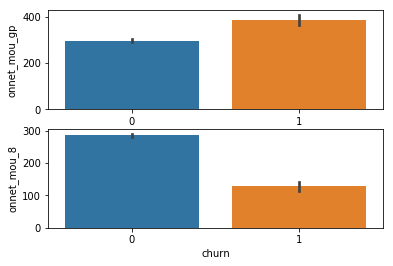

In [698]:
plt.figure()
plt.subplot(2,1,1)
sns.barplot(x='churn',y='onnet_mou_gp',data=tc4)
plt.subplot(2,1,2)
sns.barplot(x='churn',y='onnet_mou_8',data=tc4)
plt.show

we can see that for churn cutsomers total number of onnet minutes usage is decreased

<function matplotlib.pyplot.show>

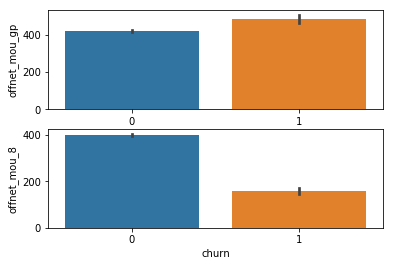

In [699]:
plt.figure()
plt.subplot(2,1,1)
sns.barplot(x='churn',y='offnet_mou_gp',data=tc4)
plt.subplot(2,1,2)
sns.barplot(x='churn',y='offnet_mou_8',data=tc4)
plt.show

Again, we can see that for churn cutsomers total number of offnet minutes usage is decreased

<function matplotlib.pyplot.show>

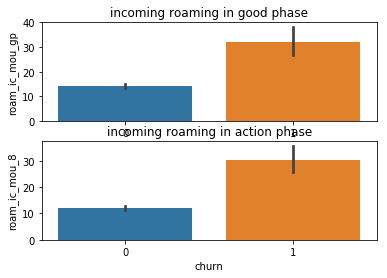

In [700]:
plt.figure()
plt.subplot(2,1,1)
plt.title('incoming roaming in good phase')
sns.barplot(x='churn',y='roam_ic_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('incoming roaming in action phase')
sns.barplot(x='churn',y='roam_ic_mou_8',data=tc4)
plt.show

Here, the trend remains the same and this is expected as till the time subscriber is using the network, the roaming incoming calls should not be effected by subscriber sentiments as subscriber doesn't initiate these calls, nor do they invest any money in incoming services. Also, such calls are mostly from family that generally have consistent pattern of making calls to their dear one. 

<function matplotlib.pyplot.show>

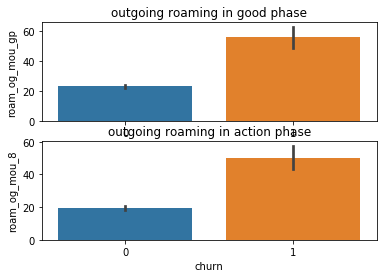

In [701]:
plt.figure()
plt.subplot(2,1,1)
plt.title('outgoing roaming in good phase')
sns.barplot(x='churn',y='roam_og_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('outgoing roaming in action phase')
sns.barplot(x='churn',y='roam_og_mou_8',data=tc4)
plt.show

Again, the same trend as above considering this too is an incoming service

<function matplotlib.pyplot.show>

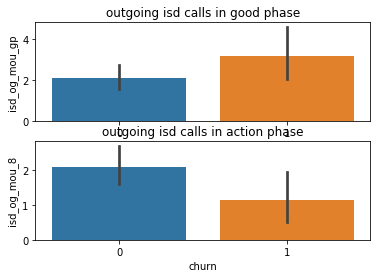

In [702]:
#isd_og_mou_gp

plt.figure()
plt.subplot(2,1,1)
plt.title('outgoing isd calls in good phase')
sns.barplot(x='churn',y='isd_og_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('outgoing isd calls in action phase')
sns.barplot(x='churn',y='isd_og_mou_8',data=tc4)
plt.show

Again, we can see that for churn cutsomers this outgoing service usage is decreased

<function matplotlib.pyplot.show>

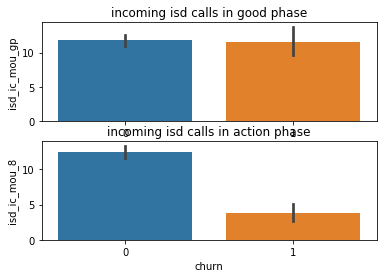

In [703]:
plt.figure()
plt.subplot(2,1,1)
plt.title('incoming isd calls in good phase')
sns.barplot(x='churn',y='isd_ic_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('incoming isd calls in action phase')
sns.barplot(x='churn',y='isd_ic_mou_8',data=tc4)
plt.show

In [704]:

# ISd incoming calls is decreasing  from good to action phase  for churners

<function matplotlib.pyplot.show>

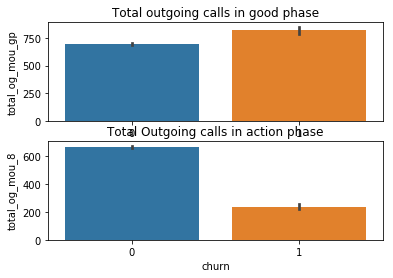

In [705]:
plt.figure()
plt.subplot(2,1,1)
plt.title('Total outgoing calls in good phase')
sns.barplot(x='churn',y='total_og_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('Total Outgoing calls in action phase')
sns.barplot(x='churn',y='total_og_mou_8',data=tc4)
plt.show

In [706]:
# we can see there is huge decrease in number of outgoing calls in action phase for churners

<function matplotlib.pyplot.show>

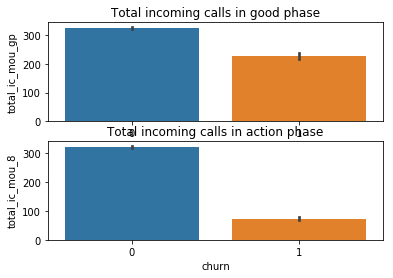

In [707]:
plt.figure()
plt.subplot(2,1,1)
plt.title('Total incoming calls in good phase')
sns.barplot(x='churn',y='total_ic_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('Total incoming calls in action phase')
sns.barplot(x='churn',y='total_ic_mou_8',data=tc4)
plt.show

In [708]:
# we can see there is huge decrease in total number of incoming calls in action phase for churners


<function matplotlib.pyplot.show>

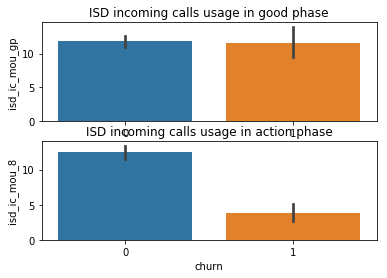

In [709]:
plt.figure()
plt.subplot(2,1,1)
plt.title('ISD incoming calls usage in good phase')
sns.barplot(x='churn',y='isd_ic_mou_gp',data=tc4)
plt.subplot(2,1,2)
plt.title('ISD incoming calls usage in action phase')
sns.barplot(x='churn',y='isd_ic_mou_8',data=tc4)
plt.show

In [710]:
# WE can see there is a decrease in usage of iSD incoming calls for churners

<function matplotlib.pyplot.show>

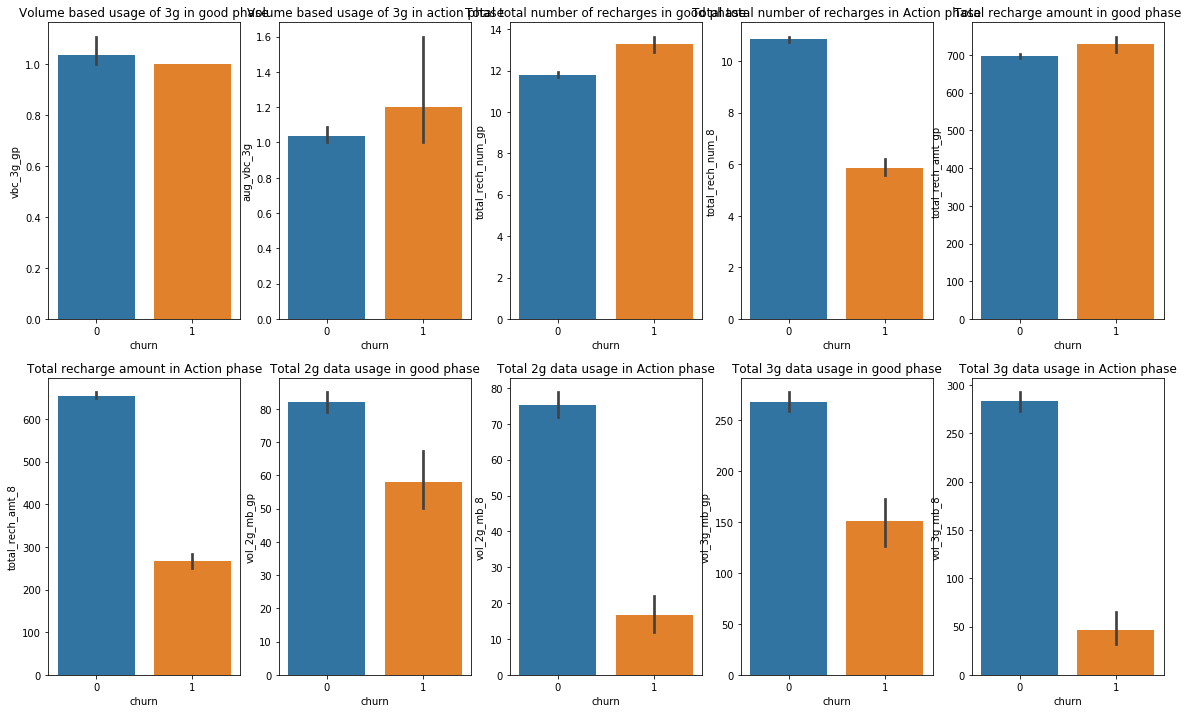

In [711]:
# Few more plots to judge the trend
plt.figure(figsize=(20,12))
plt.subplot(2,5,1)
plt.title('Volume based usage of 3g in good phase')
sns.barplot(x='churn',y=tc4['vbc_3g_gp'].value_counts(),data=tc4)
plt.subplot(2,5,2)
plt.title('Volume based usage of 3g in action phase')
sns.barplot(x='churn',y= tc4['aug_vbc_3g'].value_counts(),data=tc4)
plt.subplot(2,5,3)
plt.title('Total total number of recharges in good phase')
sns.barplot(x='churn',y='total_rech_num_gp',data=tc4)
plt.subplot(2,5,4)
plt.title('Total total number of recharges in Action phase')
sns.barplot(x='churn',y='total_rech_num_8',data=tc4)
plt.subplot(2,5,5)
plt.title('Total recharge amount in good phase')
sns.barplot(x='churn',y='total_rech_amt_gp',data=tc4)
plt.subplot(2,5,6)
plt.title('Total recharge amount in Action phase')
sns.barplot(x='churn',y='total_rech_amt_8',data=tc4)
plt.subplot(2,5,7)
plt.title('Total 2g data usage in good phase')
sns.barplot(x='churn',y='vol_2g_mb_gp',data=tc4)
plt.subplot(2,5,8)
plt.title('Total 2g data usage in Action phase')
sns.barplot(x='churn',y='vol_2g_mb_8',data=tc4)
plt.subplot(2,5,9)
plt.title('Total 3g data usage in good phase')
sns.barplot(x='churn',y='vol_3g_mb_gp',data=tc4)
plt.subplot(2,5,10)
plt.title('Total 3g data usage in Action phase')
sns.barplot(x='churn',y='vol_3g_mb_8',data=tc4)
plt.show


<function matplotlib.pyplot.show>

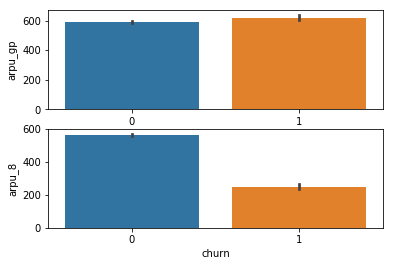

In [712]:
plt.figure()
plt.subplot(2,1,1)
sns.barplot(x='churn',y='arpu_gp',data=tc4)
plt.subplot(2,1,2)
sns.barplot(x='churn',y='arpu_8',data=tc4)
plt.show

# we can see there is decreasing trend in all the features so lets calculate the percentage of change for these attributes 

In [713]:
# Analysing few categorical variables
tc4.loc[tc4.churn == 1,"fb_user_gp"].value_counts()

1    2208
0     141
Name: fb_user_gp, dtype: int64

In [714]:
tc4.loc[tc4.churn ==1,"fb_user_8"].value_counts()

1    2231
0     118
Name: fb_user_8, dtype: int64

In [715]:
tc4.loc[tc4.churn == 1,"night_pck_user_gp"].value_counts()

0    2340
1       9
Name: night_pck_user_gp, dtype: int64

In [716]:
tc4.loc[tc4.churn == 1,"night_pck_user_8"].value_counts()

0    2341
1       8
Name: night_pck_user_8, dtype: int64

For the above categorical variables, there's only a slight change in number of users using fb or night packs

In [717]:
tc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 99 columns):
mobile_number          29055 non-null int64
loc_og_t2o_mou         29055 non-null float64
std_og_t2o_mou         29055 non-null float64
loc_ic_t2o_mou         29055 non-null float64
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8       

In [99]:
col_gp=[]
for i in tc4.columns:
    if i[-1] == 'p':
        col_gp.append(i)
print(col_gp)

['onnet_mou_gp', 'offnet_mou_gp', 'roam_ic_mou_gp', 'roam_og_mou_gp', 'total_rech_num_gp', 'total_rech_amt_gp', 'max_rech_amt_gp', 'vol_2g_mb_gp', 'vol_3g_mb_gp', 'isd_ic_mou_gp', 'monthly_3g_gp', 'monthly_2g_gp', 'sachet_3g_gp', 'sachet_2g_gp', 'fb_user_gp', 'night_pck_user_gp', 'loc_og_t2t_mou_gp', 'loc_og_t2m_mou_gp', 'loc_og_t2f_mou_gp', 'loc_og_t2c_mou_gp', 'loc_og_mou_gp', 'std_og_t2t_mou_gp', 'std_og_t2m_mou_gp', 'std_og_t2f_mou_gp', 'std_og_t2c_mou_gp', 'std_og_mou_gp', 'isd_og_mou_gp', 'spl_og_mou_gp', 'og_others_gp', 'total_og_mou_gp', 'loc_ic_t2t_mou_gp', 'loc_ic_t2m_mou_gp', 'loc_ic_t2f_mou_gp', 'loc_ic_mou_gp', 'std_ic_t2t_mou_gp', 'std_ic_t2m_mou_gp', 'std_ic_t2f_mou_gp', 'std_ic_t2o_mou_gp', 'std_ic_mou_gp', 'total_ic_mou_gp', 'spl_ic_mou_gp', 'ic_others_gp', 'arpu_gp', 'diff_gp', 'last_day_rch_amt_gp', 'vbc_3g_gp']


In [719]:
tc4[col_gp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 46 columns):
onnet_mou_gp           29055 non-null float64
offnet_mou_gp          29055 non-null float64
roam_ic_mou_gp         29055 non-null float64
roam_og_mou_gp         29055 non-null float64
total_rech_num_gp      29055 non-null int32
total_rech_amt_gp      29055 non-null int32
max_rech_amt_gp        29055 non-null int32
vol_2g_mb_gp           29055 non-null float64
vol_3g_mb_gp           29055 non-null float64
isd_ic_mou_gp          29055 non-null float64
monthly_3g_gp          29055 non-null int32
monthly_2g_gp          29055 non-null int32
sachet_3g_gp           29055 non-null int32
sachet_2g_gp           29055 non-null int32
fb_user_gp             29055 non-null int32
night_pck_user_gp      29055 non-null int32
loc_og_t2t_mou_gp      29055 non-null float64
loc_og_t2m_mou_gp      29055 non-null float64
loc_og_t2f_mou_gp      29055 non-null float64
loc_og_t2c_mou_gp      29055 non-nu

In [720]:
tc4["onnet_mou_gp"].head()

1     56.260
2    382.360
3    305.075
4     62.260
5    597.595
Name: onnet_mou_gp, dtype: float64

In [721]:
tc4["onnet_mou_8"].head()

1     52.29
2     35.08
3    534.24
4     70.61
5      7.79
Name: onnet_mou_8, dtype: float64

In [100]:
#calculating the difference between good phase and action phase 
# ch referes to change
tc4['onnet_mou_ch']=(tc4['onnet_mou_gp'] - tc4['onnet_mou_8'])
tc4['offnet_mou_ch']=(tc4['offnet_mou_gp'] - tc4['offnet_mou_8'])
tc4['roam_ic_mou_ch']=(tc4['roam_ic_mou_gp'] - tc4['roam_ic_mou_8']) 
tc4['roam_og_mou_ch']=(tc4['roam_og_mou_gp'] - tc4['roam_og_mou_8']) 
tc4['total_rech_num_ch']=(tc4['total_rech_num_gp'] - tc4['total_rech_num_8']) 
tc4['total_rech_amt_ch']=(tc4['total_rech_amt_gp'] - tc4['total_rech_amt_8']) 
tc4['max_rech_amt_ch']=(tc4['max_rech_amt_gp'] - tc4['max_rech_amt_8'])
tc4['vol_2g_mb_ch']=(tc4['vol_2g_mb_gp'] - tc4['vol_2g_mb_8'])
tc4['vol_3g_mb_ch']=(tc4['vol_3g_mb_gp'] - tc4['vol_3g_mb_8'])
tc4['isd_ic_mou_ch']=(tc4['isd_ic_mou_gp'] - tc4['isd_ic_mou_8'])
tc4['monthly_3g_ch']=(tc4['monthly_3g_gp'] - tc4['monthly_3g_8'])
tc4['monthly_2g_ch']=(tc4['monthly_2g_gp'] - tc4['monthly_2g_8'])
tc4['sachet_3g_ch']=(tc4['sachet_3g_gp'] - tc4['sachet_3g_8'])
tc4['sachet_2g_ch']=(tc4['sachet_2g_gp'] - tc4['sachet_2g_8'])
tc4['loc_og_t2t_mou_ch']=(tc4['loc_og_t2t_mou_gp'] - tc4['loc_og_t2t_mou_8'])
tc4['loc_og_t2m_mou_ch']=(tc4['loc_og_t2m_mou_gp'] - tc4['loc_og_t2m_mou_8'])
tc4['loc_og_t2f_mou_ch']=(tc4['loc_og_t2f_mou_gp'] - tc4['loc_og_t2f_mou_8'])
tc4['loc_og_t2c_mou_ch']=(tc4['loc_og_t2c_mou_gp'] - tc4['loc_og_t2c_mou_8'])
tc4['loc_og_mou_ch']=(tc4['loc_og_mou_gp'] - tc4['loc_og_mou_8'])
tc4['std_og_t2t_mou_ch']=(tc4['std_og_t2t_mou_gp'] - tc4['std_og_t2t_mou_8'])
tc4['std_og_t2m_mou_ch']=(tc4['std_og_t2m_mou_gp'] - tc4['std_og_t2m_mou_8'])
tc4['std_og_t2f_mou_ch']=(tc4['std_og_t2f_mou_gp'] - tc4['std_og_t2f_mou_8'])
tc4['std_og_t2c_mou_ch']=(tc4['std_og_t2c_mou_gp'] - tc4['std_og_t2c_mou_8'])
tc4['std_og_mou_ch']=(tc4['std_og_mou_gp'] - tc4['std_og_mou_8'])
tc4['isd_og_mou_ch']=(tc4['isd_og_mou_gp'] - tc4['isd_og_mou_8'])
tc4['spl_og_mou_ch']=(tc4['spl_og_mou_gp'] - tc4['spl_og_mou_8'])
tc4['og_others_ch']=(tc4['og_others_gp'] - tc4['og_others_8'])
tc4['total_og_mou_ch']=(tc4['total_og_mou_gp'] - tc4['total_og_mou_8'])
tc4['loc_ic_t2t_mou_ch']=(tc4['loc_ic_t2t_mou_gp'] - tc4['loc_ic_t2t_mou_8'])
tc4['loc_ic_t2m_mou_ch']=(tc4['loc_ic_t2m_mou_gp'] - tc4['loc_ic_t2m_mou_8'])
tc4['loc_ic_t2f_mou_ch']=(tc4['loc_ic_t2f_mou_gp'] - tc4['loc_ic_t2f_mou_8'])
tc4['loc_ic_mou_ch']=(tc4['loc_ic_mou_gp'] - tc4['loc_ic_mou_8'])
tc4['std_ic_t2t_mou_ch']=(tc4['std_ic_t2t_mou_gp'] - tc4['std_ic_t2t_mou_8'])
tc4['std_ic_t2m_mou_ch']=(tc4['std_ic_t2m_mou_gp'] - tc4['std_ic_t2m_mou_8'])
tc4['std_ic_t2f_mou_ch']=(tc4['std_ic_t2f_mou_gp'] - tc4['std_ic_t2f_mou_8'])
tc4['std_ic_t2o_mou_ch']=(tc4['std_ic_t2o_mou_gp'] - tc4['std_ic_t2o_mou_8'])
tc4['std_ic_mou_ch']=(tc4['std_ic_mou_gp'] - tc4['std_ic_mou_8'])
tc4['total_ic_mou_ch']=(tc4['total_ic_mou_gp'] - tc4['total_ic_mou_8'])
tc4['spl_ic_mou_ch']=(tc4['spl_ic_mou_gp'] - tc4['spl_ic_mou_8'])
tc4['isd_ic_mou_ch']=(tc4['isd_ic_mou_gp'] - tc4['isd_ic_mou_8'])
tc4['ic_others_ch']=(tc4['ic_others_gp'] - tc4['ic_others_8'])
tc4['arpu_ch']=(tc4['arpu_gp'] - tc4['arpu_8'])
tc4['diff_ch']=(tc4['diff_gp'] - tc4['diff_08'])

In [101]:
col_gp=[]
for i in tc4.columns:
    if i[-1] == 'p':
        col_gp.append(i)
print(col_gp)

['onnet_mou_gp', 'offnet_mou_gp', 'roam_ic_mou_gp', 'roam_og_mou_gp', 'total_rech_num_gp', 'total_rech_amt_gp', 'max_rech_amt_gp', 'vol_2g_mb_gp', 'vol_3g_mb_gp', 'isd_ic_mou_gp', 'monthly_3g_gp', 'monthly_2g_gp', 'sachet_3g_gp', 'sachet_2g_gp', 'fb_user_gp', 'night_pck_user_gp', 'loc_og_t2t_mou_gp', 'loc_og_t2m_mou_gp', 'loc_og_t2f_mou_gp', 'loc_og_t2c_mou_gp', 'loc_og_mou_gp', 'std_og_t2t_mou_gp', 'std_og_t2m_mou_gp', 'std_og_t2f_mou_gp', 'std_og_t2c_mou_gp', 'std_og_mou_gp', 'isd_og_mou_gp', 'spl_og_mou_gp', 'og_others_gp', 'total_og_mou_gp', 'loc_ic_t2t_mou_gp', 'loc_ic_t2m_mou_gp', 'loc_ic_t2f_mou_gp', 'loc_ic_mou_gp', 'std_ic_t2t_mou_gp', 'std_ic_t2m_mou_gp', 'std_ic_t2f_mou_gp', 'std_ic_t2o_mou_gp', 'std_ic_mou_gp', 'total_ic_mou_gp', 'spl_ic_mou_gp', 'ic_others_gp', 'arpu_gp', 'diff_gp', 'last_day_rch_amt_gp', 'vbc_3g_gp']


In [108]:
tc4['vbc_3g_ch']=(tc4['vbc_3g_gp'] - tc4['aug_vbc_3g'])
tc4['last_day_rch_amt_ch']=(tc4['last_day_rch_amt_gp'] - tc4['last_day_rch_amt_8'])

In [109]:
tc5=tc4.drop(col_gp,axis=1)

In [110]:
# Removing 'mobile number' from dataframe as its not needed for model analysis.
tc5 = tc5.drop('mobile_number', axis = 1)

In [726]:
tc5["loc_og_t2o_mou"].value_counts()

0.0    29055
Name: loc_og_t2o_mou, dtype: int64

In [727]:
tc5["std_og_t2o_mou"].value_counts()

0.0    29055
Name: std_og_t2o_mou, dtype: int64

In [728]:
tc5["loc_ic_t2o_mou"].value_counts()

0.0    29055
Name: loc_ic_t2o_mou, dtype: int64

In [111]:
# Dropping the above '0' value columns
tc5 = tc5.drop(["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], axis = 1)

In [112]:
tc5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 93 columns):
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8           29055 non-null float64
spl_og_mou_8           29055 non-null float64
og_others_8            29055 non-null float64
total_og_mou_8         29055 non-null float64
loc_ic_t2t_mou_8 

In [113]:
print(round((tc5.isnull().sum()/len(tc5.index))*100,2))

arpu_8                 0.0
onnet_mou_8            0.0
offnet_mou_8           0.0
roam_ic_mou_8          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_8           0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_8       0.0
std_og_t2c_mou_8       0.0
std_og_mou_8           0.0
isd_og_mou_8           0.0
spl_og_mou_8           0.0
og_others_8            0.0
total_og_mou_8         0.0
loc_ic_t2t_mou_8       0.0
loc_ic_t2m_mou_8       0.0
loc_ic_t2f_mou_8       0.0
loc_ic_mou_8           0.0
std_ic_t2t_mou_8       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2f_mou_8       0.0
std_ic_t2o_mou_8       0.0
std_ic_mou_8           0.0
total_ic_mou_8         0.0
spl_ic_mou_8           0.0
isd_ic_mou_8           0.0
ic_others_8            0.0
total_rech_num_8       0.0
total_rech_amt_8       0.0
max_rech_amt_8         0.0
last_day_rch_amt_8     0.0
vol_2g_mb_8            0.0
v

In [114]:
tc5["onnet_mou_ch"] = tc5["onnet_mou_ch"].astype(float)
tc5["offnet_mou_ch"] = tc5["offnet_mou_ch"].astype(float)
tc5["arpu_ch"] = tc5["arpu_ch"].astype(float)

In [115]:
print(round((tc5.isnull().sum()/len(tc5.index))*100,2))

arpu_8                 0.0
onnet_mou_8            0.0
offnet_mou_8           0.0
roam_ic_mou_8          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_8           0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_8       0.0
std_og_t2c_mou_8       0.0
std_og_mou_8           0.0
isd_og_mou_8           0.0
spl_og_mou_8           0.0
og_others_8            0.0
total_og_mou_8         0.0
loc_ic_t2t_mou_8       0.0
loc_ic_t2m_mou_8       0.0
loc_ic_t2f_mou_8       0.0
loc_ic_mou_8           0.0
std_ic_t2t_mou_8       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2f_mou_8       0.0
std_ic_t2o_mou_8       0.0
std_ic_mou_8           0.0
total_ic_mou_8         0.0
spl_ic_mou_8           0.0
isd_ic_mou_8           0.0
ic_others_8            0.0
total_rech_num_8       0.0
total_rech_amt_8       0.0
max_rech_amt_8         0.0
last_day_rch_amt_8     0.0
vol_2g_mb_8            0.0
v

In [116]:
tc5_train, tc5_test = train_test_split(tc5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [117]:
# Creating list of non-categorical values
tc6 = tc5.drop(["churn","fb_user_8","night_pck_user_8"], axis =1)

In [118]:
coln = tc6.columns

In [119]:
tc6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 90 columns):
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8           29055 non-null float64
spl_og_mou_8           29055 non-null float64
og_others_8            29055 non-null float64
total_og_mou_8         29055 non-null float64
loc_ic_t2t_mou_8 

In [739]:
print(coln)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'avg_rech', 'diff_08', 'onnet_mou_ch', 'offnet_mou_ch',
       'roam_ic_mou_ch', 'roam_og_mou_ch', 'total_rech_num_ch',
       'total_rech_amt_ch',

In [120]:
# Scaling data using Standardiaztion method
st = StandardScaler()

In [121]:
tc5_train[coln].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20338 entries, 11993 to 5641
Data columns (total 90 columns):
arpu_8                 20338 non-null float64
onnet_mou_8            20338 non-null float64
offnet_mou_8           20338 non-null float64
roam_ic_mou_8          20338 non-null float64
roam_og_mou_8          20338 non-null float64
loc_og_t2t_mou_8       20338 non-null float64
loc_og_t2m_mou_8       20338 non-null float64
loc_og_t2f_mou_8       20338 non-null float64
loc_og_t2c_mou_8       20338 non-null float64
loc_og_mou_8           20338 non-null float64
std_og_t2t_mou_8       20338 non-null float64
std_og_t2m_mou_8       20338 non-null float64
std_og_t2f_mou_8       20338 non-null float64
std_og_t2c_mou_8       20338 non-null float64
std_og_mou_8           20338 non-null float64
isd_og_mou_8           20338 non-null float64
spl_og_mou_8           20338 non-null float64
og_others_8            20338 non-null float64
total_og_mou_8         20338 non-null float64
loc_ic_t2t_mou

In [122]:
cols = tc6.select_dtypes(include=['int64','float64']).columns.values



In [123]:
tc5_train[cols] = st.fit_transform(tc5_train[cols])

In [124]:
# for test columns we dont need to fit
tc5_test[cols] = st.transform(tc5_test[cols])

In [745]:
# splitting the train data into X_train with predictor variables and y_train for target variable

In [125]:
y_train = tc5_train.pop('churn')

In [126]:
y_test = tc5_test.pop('churn')

In [127]:
X_train = tc5_train

In [128]:
X_test = tc5_test

In [129]:
round(100*(tc5.churn.value_counts()/len(tc5.index)),2)

0    91.92
1     8.08
Name: churn, dtype: float64

In [130]:
# Balancing the churn based data as dataset suffers from huge data imbalance as shown previosuly 
# Will use oversampling first as dataset is not that big. Also, sampling is being done after train-test split
from sklearn.utils import resample

In [131]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X[X.churn==0]
churn = X[X.churn==1]

In [754]:
(len(not_churn)*0.8)

14969.6

In [132]:
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=int(len(not_churn)*0.7), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
X_up = pd.concat([not_churn, churn_upsampled])

In [133]:
round(100*(X_up.churn.value_counts()/len(X_up.index)),2)

0    58.82
1    41.18
Name: churn, dtype: float64

In [134]:
y_train = X_up.churn
X_train = X_up.drop('churn', axis=1)

In [135]:
#PCA to reduce variables
pca = PCA(svd_solver='randomized', random_state=42)

In [136]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [137]:
pca.components_

array([[ 1.61613351e-01,  1.11097155e-01,  1.37605249e-01, ...,
         7.31597337e-02, -2.73957652e-02, -6.63590395e-02],
       [ 1.78866870e-01,  5.28069469e-02,  8.53430258e-02, ...,
         2.42066230e-02, -2.39515042e-02, -7.42776250e-02],
       [-8.83420112e-02,  3.66128340e-02, -3.65395654e-02, ...,
        -1.10110236e-02,  6.22857903e-02,  3.98074078e-02],
       ...,
       [ 0.00000000e+00,  1.37418649e-15,  1.54251678e-15, ...,
         2.16840434e-17,  1.60461922e-16,  6.93889390e-18],
       [-0.00000000e+00, -1.11765909e-15, -1.27377426e-15, ...,
         2.68882139e-17,  8.67361738e-18, -3.12250226e-17],
       [ 0.00000000e+00, -1.09751664e-16, -1.41921745e-16, ...,
         5.96311195e-19, -9.43255890e-18, -4.33680869e-19]])

In [761]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_8,0.161888,0.177779
1,onnet_mou_8,0.111564,0.058537
2,offnet_mou_8,0.138192,0.087862
3,roam_ic_mou_8,-0.007342,0.391646
4,roam_og_mou_8,0.005007,0.368933


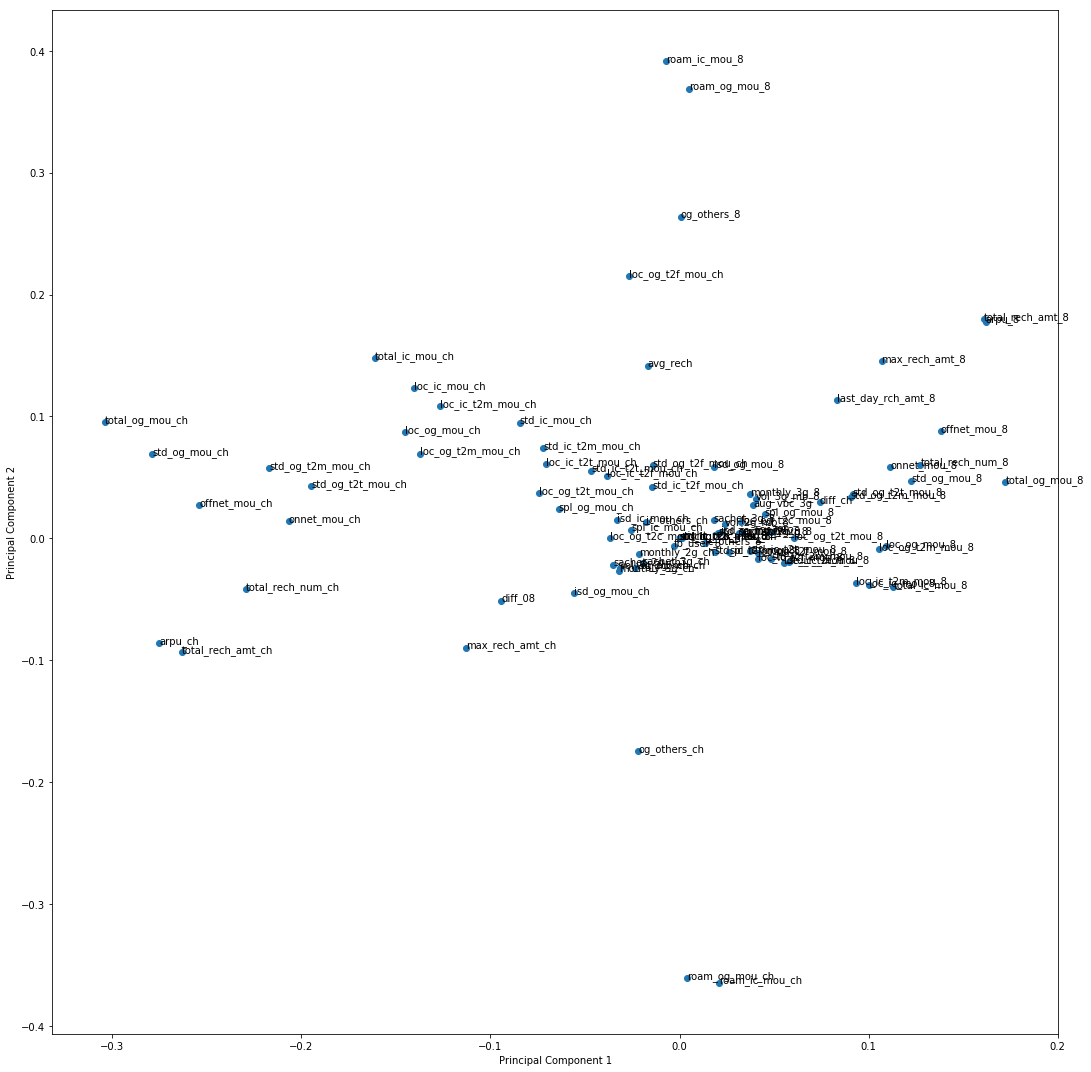

In [762]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We can see the important PC1s and PC2s towards max values along their respective axis. Lot of variables have negligible influence wrt both components (features in the middle).

In [763]:
#Looking at the screeplot to assess the number of needed principal components
pca.explained_variance_ratio_

array([  1.51677182e-01,   5.24139387e-02,   4.90092818e-02,
         4.59033495e-02,   3.97167658e-02,   3.66180941e-02,
         3.29429283e-02,   3.13441364e-02,   2.94556936e-02,
         2.64129762e-02,   2.57201330e-02,   2.30980753e-02,
         2.04624977e-02,   1.96182663e-02,   1.85743944e-02,
         1.78306828e-02,   1.66306830e-02,   1.62200437e-02,
         1.57339211e-02,   1.48124958e-02,   1.45345277e-02,
         1.40404052e-02,   1.36034148e-02,   1.33835216e-02,
         1.28476295e-02,   1.25050332e-02,   1.22259030e-02,
         1.17663208e-02,   1.14211759e-02,   1.05177757e-02,
         1.02240525e-02,   9.67096337e-03,   9.47209633e-03,
         9.38764747e-03,   8.90638682e-03,   8.62399081e-03,
         8.28467662e-03,   7.84331382e-03,   7.64122353e-03,
         7.61876979e-03,   6.92342294e-03,   6.82637628e-03,
         6.45974246e-03,   6.15230789e-03,   5.91802856e-03,
         5.51826762e-03,   4.92623758e-03,   4.82436126e-03,
         4.62561784e-03,

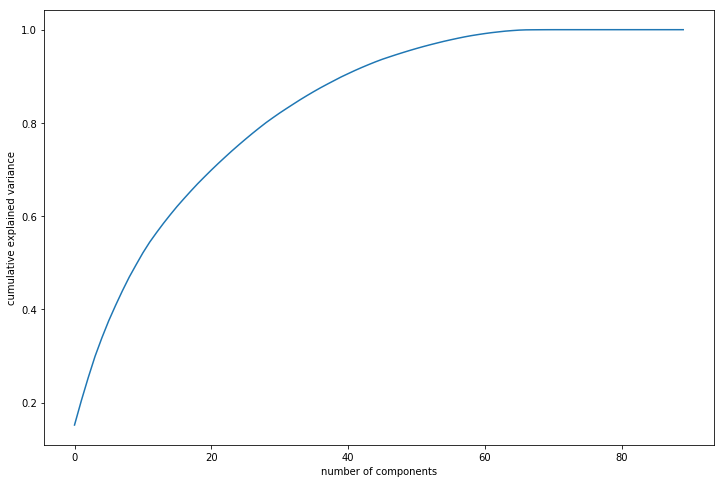

In [764]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [765]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.15167718,  0.20409112,  0.2531004 ,  0.29900375,  0.33872052,
        0.37533861,  0.40828154,  0.43962568,  0.46908137,  0.49549435,
        0.52121448,  0.54431255,  0.56477505,  0.58439332,  0.60296771,
        0.6207984 ,  0.63742908,  0.65364912,  0.66938304,  0.68419554,
        0.69873007,  0.71277047,  0.72637389,  0.73975741,  0.75260504,
        0.76511007,  0.77733597,  0.7891023 ,  0.80052347,  0.81104125,
        0.8212653 ,  0.83093626,  0.84040836,  0.84979601,  0.85870239,
        0.86732638,  0.87561106,  0.88345437,  0.8910956 ,  0.89871437,
        0.90563779,  0.91246417,  0.91892391,  0.92507622,  0.93099425,
        0.93651251,  0.94143875,  0.94626311,  0.95088873,  0.95538108,
        0.95968444,  0.96380348,  0.96767505,  0.97137826,  0.97500037,
        0.97829081,  0.98147797,  0.98447999,  0.98717557,  0.98951444,
        0.99171116,  0.99366202,  0.99531701,  0.99692132,  0.99808126,
        0.99907985,  0.99961907,  0.99978322,  0.99987619,  0.99

From the above graph, we can see that about 45 features explain maximum variance as after this point, the graph flattens out. So selecting top 60 features

In [766]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

The accuracy scores look ok on both train and test datasets. However, both precision and recall (sensitivity) are lower for both cut off values so if you can optimize the model further by perhaps, using lambda regression after PCA, or using RFE before PCA.
You can also use lasso regularization for feature selection in the case of random forest model and see if aprt from giving us key features, it can give us better churn model too.
Over to you now. All the best

In [767]:
# lets obtain polynomial features and then do a pca and fit the model

In [769]:
#From the above graph, we can see that about 40 features explain maximum variance as after this point, the graph flattens out. So selecting top 60 features

#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [770]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [771]:
# Assessing the model with StatsModels for logistic regression based churn model
X_train_sm = sm.add_constant(X_train_pca)
lgr1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgr1.fit()

In [772]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([ 0.39242081,  0.16940401,  0.02994473,  0.28966906,  0.00847817,
        0.23193879,  0.13554311,  0.40326279,  0.29157453,  0.27756287])

In [773]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([ 0.39242081,  0.16940401,  0.02994473,  0.28966906,  0.00847817,
        0.23193879,  0.13554311,  0.40326279,  0.29157453,  0.27756287])

In [774]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.392421
1,0,0.169404
2,0,0.029945
3,0,0.289669
4,0,0.008478


In [775]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [776]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

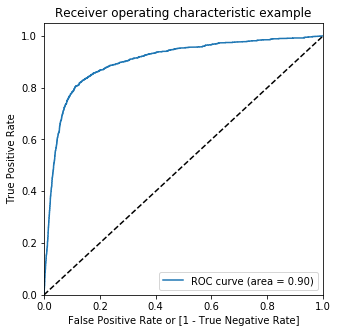

In [777]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [778]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.392421,1,1,1,1,0,0,0,0,0,0
1,0,0.169404,1,1,0,0,0,0,0,0,0,0
2,0,0.029945,1,0,0,0,0,0,0,0,0,0
3,0,0.289669,1,1,1,0,0,0,0,0,0,0
4,0,0.008478,1,0,0,0,0,0,0,0,0,0


In [779]:
cutoff = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci','prec'])

In [780]:
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cml = metrics.confusion_matrix(y_train_pred_final.Churn.astype(int), y_train_pred_final[i])
    total = sum(sum(cml))
    accuracy = (cml[0,0] + cml[1,1])/total
    sensi = cml[1,1]/(cml[1,0] + cml[1,1])
    speci = cml[0,0]/(cml[0,0] + cml[0,1])
    prec = cml[1,1]/(cml[1,1] + cml[0,1])
    cutoff.loc[i] = [i,accuracy, sensi, speci, prec]
print(cutoff)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.411757  1.000000  0.000000  0.411757
0.1   0.1  0.654291  0.957856  0.441802  0.545692
0.2   0.2  0.746463  0.931211  0.617144  0.629978
0.3   0.3  0.800597  0.893113  0.735838  0.702963
0.4   0.4  0.835649  0.857154  0.820596  0.769816
0.5   0.5  0.850079  0.808520  0.879168  0.824060
0.6   0.6  0.848035  0.747366  0.918501  0.865211
0.7   0.7  0.816787  0.632845  0.945543  0.890524
0.8   0.8  0.757309  0.452512  0.970661  0.915225
0.9   0.9  0.663251  0.199496  0.987869  0.920070


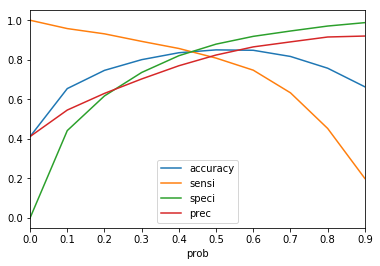

In [781]:
cutoff.plot.line(x = 'prob', y = ['accuracy', 'sensi','speci','prec'])
plt.show()

In [782]:
y_train_pred_final['pred_Churn_Value_1'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x > 0.4 else 0)

In [783]:
X_test_sm = sm.add_constant(X_test_pca)
y_test_pred = res.predict(X_test_sm)
y_test_pred

array([ 0.16372379,  0.87379511,  0.09484199, ...,  0.59654132,
        0.02778324,  0.28226565])

In [784]:
y_test_pred_dat = pd.DataFrame()
y_test_pred_dat['Churn'] = y_test
y_test1 = pd.DataFrame()
y_test1['Churn_prob'] = y_test_pred
y_test_pred_dat.reset_index(drop= True, inplace = True)
y_test1.reset_index(drop = True, inplace = True)
y_test_pred_dat = pd.concat([y_test_pred_dat, y_test1], axis =1)
y_test_pred_dat['Churn_pred_val_1'] = y_test_pred_dat.Churn_prob.map(lambda x:1 if x > 0.4 else 0)
#y_test_pred_dat['Churn_pred_val_2'] = y_test_pred_dat.Churn_prob.map(lambda x:1 if x > 0.6 else 0)



In [785]:
print(metrics.accuracy_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_1))

0.825742801423


In [786]:
print(metrics.precision_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_1))

0.3039408867


In [787]:
print(metrics.recall_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_1))

0.853388658368


In [ ]:
# In this Model we are able to boost up the recall little bit

In [789]:
tc5_train, tc5_test = train_test_split(tc5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [790]:
# Creating list of non-categorical values
tc6 = tc5.drop(["churn","fb_user_8","night_pck_user_8"], axis =1)

In [791]:
coln = tc6.columns

In [792]:
tc6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 88 columns):
arpu_8                29055 non-null float64
onnet_mou_8           29055 non-null float64
offnet_mou_8          29055 non-null float64
roam_ic_mou_8         29055 non-null float64
roam_og_mou_8         29055 non-null float64
loc_og_t2t_mou_8      29055 non-null float64
loc_og_t2m_mou_8      29055 non-null float64
loc_og_t2f_mou_8      29055 non-null float64
loc_og_t2c_mou_8      29055 non-null float64
loc_og_mou_8          29055 non-null float64
std_og_t2t_mou_8      29055 non-null float64
std_og_t2m_mou_8      29055 non-null float64
std_og_t2f_mou_8      29055 non-null float64
std_og_t2c_mou_8      29055 non-null float64
std_og_mou_8          29055 non-null float64
isd_og_mou_8          29055 non-null float64
spl_og_mou_8          29055 non-null float64
og_others_8           29055 non-null float64
total_og_mou_8        29055 non-null float64
loc_ic_t2t_mou_8      29055 non-null

In [793]:
print(coln)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'avg_rech', 'diff_08', 'onnet_mou_ch', 'offnet_mou_ch',
       'roam_ic_mou_ch', 'roam_og_mou_ch', 'total_rech_num_ch',
       'total_rech_amt_ch',

In [794]:
# Scaling data using Standardiaztion method
st = StandardScaler()

In [795]:
tc5_train[coln].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20338 entries, 11993 to 5641
Data columns (total 88 columns):
arpu_8                20338 non-null float64
onnet_mou_8           20338 non-null float64
offnet_mou_8          20338 non-null float64
roam_ic_mou_8         20338 non-null float64
roam_og_mou_8         20338 non-null float64
loc_og_t2t_mou_8      20338 non-null float64
loc_og_t2m_mou_8      20338 non-null float64
loc_og_t2f_mou_8      20338 non-null float64
loc_og_t2c_mou_8      20338 non-null float64
loc_og_mou_8          20338 non-null float64
std_og_t2t_mou_8      20338 non-null float64
std_og_t2m_mou_8      20338 non-null float64
std_og_t2f_mou_8      20338 non-null float64
std_og_t2c_mou_8      20338 non-null float64
std_og_mou_8          20338 non-null float64
isd_og_mou_8          20338 non-null float64
spl_og_mou_8          20338 non-null float64
og_others_8           20338 non-null float64
total_og_mou_8        20338 non-null float64
loc_ic_t2t_mou_8      20338 non-n

In [796]:
cols = tc6.select_dtypes(include=['int64','float64']).columns.values



In [797]:
tc5_train[cols] = st.fit_transform(tc5_train[cols])

In [798]:
# for test columns we dont need to fit
tc5_test[cols] = st.transform(tc5_test[cols])

In [799]:
# splitting the train data into X_train with predictor variables and y_train for target variable

In [800]:
y_train = tc5_train.pop('churn')

In [801]:
y_test = tc5_test.pop('churn')

In [802]:
X_train = tc5_train

In [803]:
X_test = tc5_test

In [804]:
round(100*(tc5.churn.value_counts()/len(tc5.index)),2)

0    91.92
1     8.08
Name: churn, dtype: float64

In [805]:
# Balancing the churn based data as dataset suffers from huge data imbalance as shown previosuly 
# Will use oversampling first as dataset is not that big. Also, sampling is being done after train-test split
from sklearn.utils import resample

In [806]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X[X.churn==0]
churn = X[X.churn==1]

In [807]:
# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=int(len(not_churn)*0.7), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
X_up = pd.concat([not_churn, churn_upsampled])

In [808]:
round(100*(X_up.churn.value_counts()/len(X_up.index)),2)

0    58.82
1    41.18
Name: churn, dtype: float64

In [809]:
y_train = X_up.churn
X_train = X_up.drop('churn', axis=1)

In [810]:
from sklearn.preprocessing import PolynomialFeatures

In [814]:
ploy=PolynomialFeatures(degree=2)

In [815]:
ploy.fit_transform(X_train) # facing memory error issue for degre greate r than 2

array([[  1.00000000e+00,  -7.87325454e-02,   8.24809132e-01, ...,
          4.28610321e-04,   4.39286832e-03,   4.50229291e-02],
       [  1.00000000e+00,  -1.01054261e-01,  -5.06146394e-01, ...,
          1.94638021e-02,  -1.08029672e-01,   5.99595596e-01],
       [  1.00000000e+00,  -6.89623940e-02,  -4.70805152e-01, ...,
          6.13765352e-02,  -5.25675888e-02,   4.50229291e-02],
       ..., 
       [  1.00000000e+00,  -1.05723815e+00,  -5.90705195e-01, ...,
          7.24278857e+00,   1.10203816e+00,   1.67682390e-01],
       [  1.00000000e+00,  -5.01761519e-01,  -1.20319763e-01, ...,
          7.88930131e-02,   5.95986119e-02,   4.50229291e-02],
       [  1.00000000e+00,  -5.80405859e-01,  -3.72023127e-01, ...,
          5.26016805e-03,   5.83189058e-02,   6.46575307e-01]])

In [816]:
#PCA to reduce variables
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(X_train)

pca.components_




#Looking at the screeplot to assess the number of needed principal components
pca.explained_variance_ratio_





array([  1.51677182e-01,   5.24139387e-02,   4.90092818e-02,
         4.59033495e-02,   3.97167658e-02,   3.66180941e-02,
         3.29429283e-02,   3.13441364e-02,   2.94556936e-02,
         2.64129762e-02,   2.57201330e-02,   2.30980753e-02,
         2.04624977e-02,   1.96182663e-02,   1.85743944e-02,
         1.78306828e-02,   1.66306830e-02,   1.62200437e-02,
         1.57339211e-02,   1.48124958e-02,   1.45345277e-02,
         1.40404052e-02,   1.36034148e-02,   1.33835216e-02,
         1.28476295e-02,   1.25050332e-02,   1.22259030e-02,
         1.17663208e-02,   1.14211759e-02,   1.05177757e-02,
         1.02240525e-02,   9.67096337e-03,   9.47209633e-03,
         9.38764747e-03,   8.90638682e-03,   8.62399081e-03,
         8.28467662e-03,   7.84331382e-03,   7.64122353e-03,
         7.61876979e-03,   6.92342294e-03,   6.82637628e-03,
         6.45974246e-03,   6.15230789e-03,   5.91802856e-03,
         5.51826762e-03,   4.92623758e-03,   4.82436126e-03,
         4.62561784e-03,

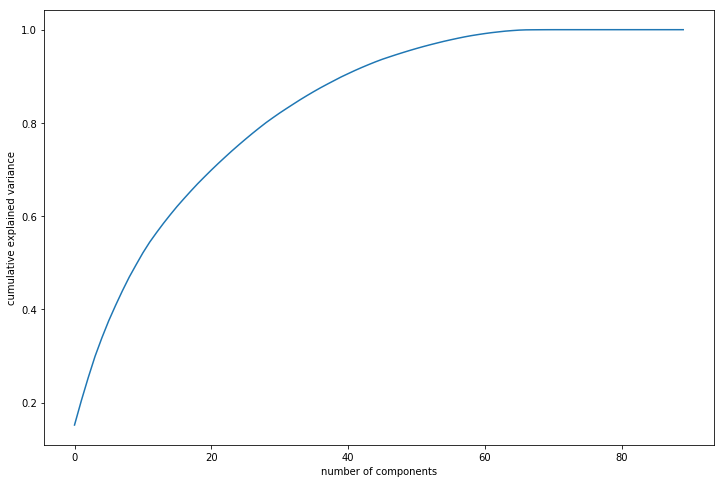

In [817]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [818]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.15167718,  0.20409112,  0.2531004 ,  0.29900375,  0.33872052,
        0.37533861,  0.40828154,  0.43962568,  0.46908137,  0.49549435,
        0.52121448,  0.54431255,  0.56477505,  0.58439332,  0.60296771,
        0.6207984 ,  0.63742908,  0.65364912,  0.66938304,  0.68419554,
        0.69873007,  0.71277047,  0.72637389,  0.73975741,  0.75260504,
        0.76511007,  0.77733597,  0.7891023 ,  0.80052347,  0.81104125,
        0.8212653 ,  0.83093626,  0.84040836,  0.84979601,  0.85870239,
        0.86732638,  0.87561106,  0.88345437,  0.8910956 ,  0.89871437,
        0.90563779,  0.91246417,  0.91892391,  0.92507622,  0.93099425,
        0.93651251,  0.94143875,  0.94626311,  0.95088873,  0.95538108,
        0.95968444,  0.96380348,  0.96767505,  0.97137826,  0.97500037,
        0.97829081,  0.98147797,  0.98447999,  0.98717557,  0.98951444,
        0.99171116,  0.99366202,  0.99531701,  0.99692132,  0.99808126,
        0.99907985,  0.99961907,  0.99978322,  0.99987619,  0.99

In [819]:
#From the above graph, we can see that about 40 features explain maximum variance as after this point, the graph flattens out. So selecting top 60 features

#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=42)

In [820]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [821]:
# Assessing the model with StatsModels for logistic regression based churn model
X_train_sm = sm.add_constant(X_train_pca)
lgr1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgr1.fit()

In [822]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([ 0.40610884,  0.16198074,  0.02333169,  0.21716456,  0.0088866 ,
        0.21801945,  0.1320838 ,  0.40985113,  0.29637665,  0.28972496])

In [823]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([ 0.40610884,  0.16198074,  0.02333169,  0.21716456,  0.0088866 ,
        0.21801945,  0.1320838 ,  0.40985113,  0.29637665,  0.28972496])

In [824]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.406109
1,0,0.161981
2,0,0.023332
3,0,0.217165
4,0,0.008887


In [825]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [826]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

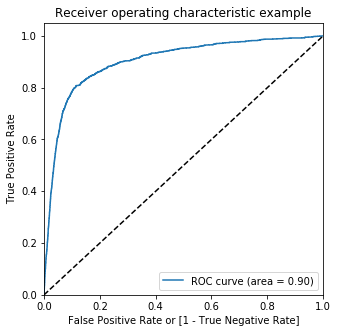

In [827]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [828]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.406109,1,1,1,1,1,0,0,0,0,0
1,0,0.161981,1,1,0,0,0,0,0,0,0,0
2,0,0.023332,1,0,0,0,0,0,0,0,0,0
3,0,0.217165,1,1,1,0,0,0,0,0,0,0
4,0,0.008887,1,0,0,0,0,0,0,0,0,0


In [829]:
cutoff = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci','prec'])

In [830]:
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cml = metrics.confusion_matrix(y_train_pred_final.Churn.astype(int), y_train_pred_final[i])
    total = sum(sum(cml))
    accuracy = (cml[0,0] + cml[1,1])/total
    sensi = cml[1,1]/(cml[1,0] + cml[1,1])
    speci = cml[0,0]/(cml[0,0] + cml[0,1])
    prec = cml[1,1]/(cml[1,1] + cml[0,1])
    cutoff.loc[i] = [i,accuracy, sensi, speci, prec]
print(cutoff)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.411757  1.000000  0.000000  0.411757
0.1   0.1  0.654511  0.959612  0.440947  0.545766
0.2   0.2  0.745835  0.933730  0.614312  0.628889
0.3   0.3  0.800597  0.895557  0.734128  0.702185
0.4   0.4  0.832537  0.853260  0.818031  0.766477
0.5   0.5  0.850110  0.808215  0.879436  0.824326
0.6   0.6  0.847909  0.747748  0.918021  0.864583
0.7   0.7  0.817730  0.634830  0.945757  0.891211
0.8   0.8  0.753317  0.443656  0.970073  0.912102
0.9   0.9  0.664508  0.202168  0.988136  0.922648


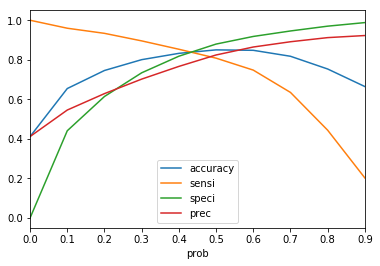

In [831]:
cutoff.plot.line(x = 'prob', y = ['accuracy', 'sensi','speci','prec'])
plt.show()

In [832]:
y_train_pred_final['pred_Churn_Value_1'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x >= 0.5 else 0)

In [833]:
X_test_sm = sm.add_constant(X_test_pca)
y_test_pred = res.predict(X_test_sm)
y_test_pred

array([ 0.16088828,  0.87644867,  0.09088044, ...,  0.58663814,
        0.01975612,  0.27263365])

In [834]:
y_test_pred_dat = pd.DataFrame()
y_test_pred_dat['Churn'] = y_test
y_test1 = pd.DataFrame()
y_test1['Churn_prob'] = y_test_pred
y_test_pred_dat.reset_index(drop= True, inplace = True)
y_test1.reset_index(drop = True, inplace = True)
y_test_pred_dat = pd.concat([y_test_pred_dat, y_test1], axis =1)
y_test_pred_dat['Churn_pred_val_1'] = y_test_pred_dat.Churn_prob.map(lambda x:1 if x >= 0.5 else 0)
#y_test_pred_dat['Churn_pred_val_2'] = y_test_pred_dat.Churn_prob.map(lambda x:1 if x > 0.6 else 0)



In [835]:
print(metrics.accuracy_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_1))

0.87312148675


In [836]:
print(metrics.precision_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_1))

0.375891121192


In [837]:
print(metrics.recall_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_1))

0.802213001383


In [838]:
# Here also a precision score is much beter than previous model

In [840]:
y_train_pred_final['pred_Churn_Value_2'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x >= 0.6 else 0)

In [841]:
y_test_pred_dat['Churn_pred_val_2'] = y_test_pred_dat.Churn_prob.map(lambda x:1 if x > 0.6 else 0)

In [844]:
print(metrics.accuracy_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2))

0.900653894689


In [845]:
print(metrics.precision_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2))

0.440366972477


In [846]:
print(metrics.recall_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2))

0.730290456432


In [847]:
# If we take the cutoff as 0.6 then precision score is increased for test data lets calculate the F1 score

In [850]:
2*(metrics.precision_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2)*metrics.recall_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2))/(metrics.precision_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2)+metrics.recall_score(y_test_pred_dat.Churn.astype(int), y_test_pred_dat.Churn_pred_val_2))

0.54942767950052018

In [855]:
# Random Forest

In [138]:
X=tc5.drop('churn',axis=1)
y=tc5.churn

In [139]:
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [140]:
#PCA to reduce variables
pca = PCA(svd_solver='randomized', random_state=42)

In [141]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [142]:
#Looking at the screeplot to assess the number of needed principal components
pca.explained_variance_ratio_

array([2.55959021e-01, 1.52845088e-01, 1.30465106e-01, 8.85371024e-02,
       6.67624327e-02, 5.23519180e-02, 4.58349782e-02, 3.59578766e-02,
       2.43184422e-02, 2.03622993e-02, 1.81335948e-02, 1.54601922e-02,
       1.41086022e-02, 1.31745061e-02, 9.17020263e-03, 7.63848356e-03,
       6.80795908e-03, 6.64345073e-03, 4.75123584e-03, 3.89030533e-03,
       3.79842027e-03, 3.44262817e-03, 3.16310804e-03, 2.88243146e-03,
       2.14199281e-03, 2.00305284e-03, 1.26726262e-03, 1.23250861e-03,
       1.04401731e-03, 1.02050249e-03, 9.56242946e-04, 7.60943394e-04,
       4.21205811e-04, 3.83445280e-04, 3.68499704e-04, 3.37321607e-04,
       3.06778544e-04, 2.78094061e-04, 1.67520064e-04, 1.54711203e-04,
       1.30313707e-04, 1.13589418e-04, 8.48142950e-05, 7.23613605e-05,
       5.86472950e-05, 3.57668897e-05, 3.42784441e-05, 2.92869931e-05,
       2.61203342e-05, 2.39575148e-05, 2.19903048e-05, 1.39261374e-05,
       1.11047268e-05, 9.33281580e-06, 8.87767976e-06, 7.45709628e-06,
      

In [143]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25595902, 0.40880411, 0.53926921, 0.62780632, 0.69456875,
       0.74692067, 0.79275565, 0.82871352, 0.85303196, 0.87339426,
       0.89152786, 0.90698805, 0.92109665, 0.93427116, 0.94344136,
       0.95107985, 0.9578878 , 0.96453126, 0.96928249, 0.9731728 ,
       0.97697122, 0.98041384, 0.98357695, 0.98645938, 0.98860138,
       0.99060443, 0.99187169, 0.9931042 , 0.99414822, 0.99516872,
       0.99612496, 0.99688591, 0.99730711, 0.99769056, 0.99805906,
       0.99839638, 0.99870316, 0.99898125, 0.99914877, 0.99930348,
       0.9994338 , 0.99954739, 0.9996322 , 0.99970456, 0.99976321,
       0.99979898, 0.99983325, 0.99986254, 0.99988866, 0.99991262,
       0.99993461, 0.99994854, 0.99995964, 0.99996897, 0.99997785,
       0.99998531, 0.99999058, 0.99999347, 0.99999591, 0.99999741,
       0.99999835, 0.9999989 , 0.99999941, 0.99999959, 0.99999975,
       0.99999988, 0.99999991, 0.99999995, 0.99999997, 0.99999998,
       0.99999999, 0.99999999, 1.        , 1.        , 1.     

In [863]:
#We can see 12 components are enough to explain 90 percent variance

In [144]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=12)

In [152]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca=pca_final.transform(X_test)
X_train_pca.shape

(20338, 12)

In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight="balanced") # for class imbalance

In [154]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [155]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [156]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [157]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7994
           1       0.68      0.32      0.44       723

   micro avg       0.93      0.93      0.93      8717
   macro avg       0.81      0.65      0.70      8717
weighted avg       0.92      0.93      0.92      8717



In [ ]:
# we can see that precision is improved for random forest classifier


In [158]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7885  109]
 [ 491  232]]


In [159]:
print(accuracy_score(y_test,predictions))

0.9311689801537226


In [881]:
# Lets try tuning some hyper parameters

In [160]:
# Max depth tuning using CV an
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 50, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(10, 50, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

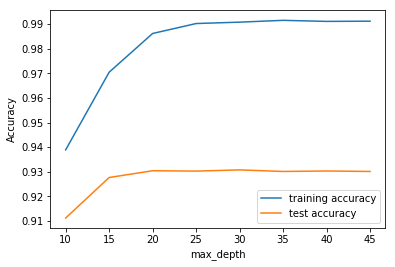

In [887]:
# scores of GridSearch CV
scores = rf.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# we can consider max depth of 15 
# Lets Tune n estimators 

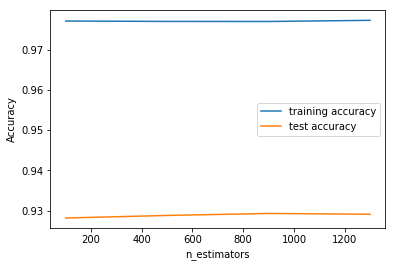

In [161]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=15,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_pca, y_train)
# scores of GridSearch CV
scores = rf.cv_results_
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [889]:
# Lets build a tree with n_estimators as 900 and max_depth as 15
# we can ld other 

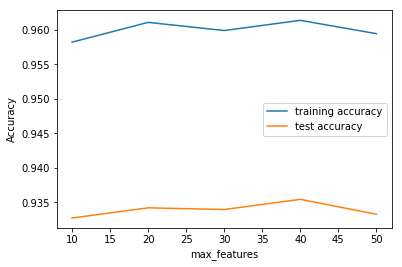

In [903]:
# tuning Max_features


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10,20,30,40,50]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)
scores = rf.cv_results_
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# we can consider around 20 features

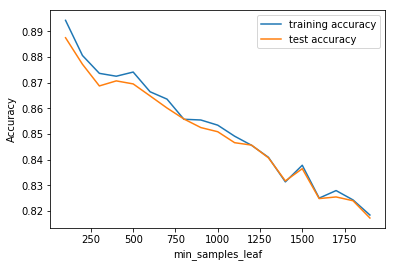

In [904]:
# tuning min_smaples_leaf


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 2000, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)
scores = rf.cv_results_
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [905]:
# we can consider around 750 samples

<function matplotlib.pyplot.legend>

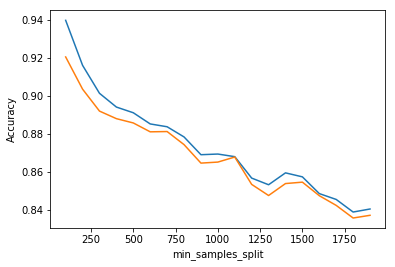

In [907]:
scores = rf.cv_results_
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend

In [908]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,15,20],
    'min_samples_leaf': range(100, 1000, 200),
    'min_samples_split': range(200, 1000, 200),
    'n_estimators': [100,500,1000], 
    'max_features': [10,15,20]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.1min


In [164]:
rf=RandomForestClassifier(max_depth=15,n_estimators=900,class_weight="balanced")
#rf=RandomForestClassifier(max_depth=15,n_estimators=2000,class_weight="balanced")

In [165]:
rf.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [898]:
predictions=rf.predict(X_test_pca)

In [166]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7994
           1       0.68      0.32      0.44       723

   micro avg       0.93      0.93      0.93      8717
   macro avg       0.81      0.65      0.70      8717
weighted avg       0.92      0.93      0.92      8717



The above Random forest model comes out to be the best model for estimating 'churn' with good scores for all important model performance evaluators. Following are some of the ideal key hyper parameter values that were estimated using gridsearch:
1. Max Features : 20 (PCA had reduced features to 12 so we used all 12 features)
2. Max_depth : 15
3. n_Estimators : 900 
4. min_samples_leaf: 750
Following code will now calculate churn for original dataframe 'tc5'

In [167]:
tc5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 93 columns):
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8           29055 non-null float64
spl_og_mou_8           29055 non-null float64
og_others_8            29055 non-null float64
total_og_mou_8         29055 non-null float64
loc_ic_t2t_mou_8 

In [168]:
tcf = tc5.drop('churn', axis =1)

In [170]:
X_f_pca = pca_final.transform(tcf)

In [174]:
pred = rf.predict(X_f_pca)

In [175]:
pred.reshape(-1)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [178]:
pred_dat = pd.DataFrame({"Churn_model":pred})

In [179]:
pred_dat.head()

,Churn_model
0,1
1,0
2,0
3,0
4,1


In [180]:
pred_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 0 to 29054
Data columns (total 1 columns):
Churn_model    29055 non-null int64
dtypes: int64(1)
memory usage: 227.1 KB


In [181]:
pred_dat.index = pd.RangeIndex(1, len(pred_dat.index) + 1)

In [182]:
tcf = pd.concat([tcf, pred_dat], axis=1)

In [183]:
tc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Columns: 143 entries, mobile_number to last_day_rch_amt_ch
dtypes: float64(109), int32(12), int64(22)
memory usage: 30.4 MB


In [184]:
tcf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 93 columns):
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8           29055 non-null float64
spl_og_mou_8           29055 non-null float64
og_others_8            29055 non-null float64
total_og_mou_8         29055 non-null float64
loc_ic_t2t_mou_8 

In [185]:
tcf["mobile_number"] = tc4["mobile_number"]

In [186]:
tcf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29055 entries, 1 to 29055
Data columns (total 94 columns):
arpu_8                 29055 non-null float64
onnet_mou_8            29055 non-null float64
offnet_mou_8           29055 non-null float64
roam_ic_mou_8          29055 non-null float64
roam_og_mou_8          29055 non-null float64
loc_og_t2t_mou_8       29055 non-null float64
loc_og_t2m_mou_8       29055 non-null float64
loc_og_t2f_mou_8       29055 non-null float64
loc_og_t2c_mou_8       29055 non-null float64
loc_og_mou_8           29055 non-null float64
std_og_t2t_mou_8       29055 non-null float64
std_og_t2m_mou_8       29055 non-null float64
std_og_t2f_mou_8       29055 non-null float64
std_og_t2c_mou_8       29055 non-null float64
std_og_mou_8           29055 non-null float64
isd_og_mou_8           29055 non-null float64
spl_og_mou_8           29055 non-null float64
og_others_8            29055 non-null float64
total_og_mou_8         29055 non-null float64
loc_ic_t2t_mou_8 

In [188]:
# Following are the subscribers (identified via mobile numbers) that churned as per model. 
print(tcf.loc[tcf["Churn_model"] ==1, "mobile_number"])

1        7000701601
5        7000187447
17       7002393996
23       7000589828
28       7001300706
30       7000973464
35       7000106299
51       7000340381
79       7001873090
80       7002397045
91       7000959346
95       7000465250
96       7002367203
99       7002255278
107      7000310042
121      7000506605
127      7000104470
136      7000142585
146      7000488051
151      7000749983
157      7000248548
160      7001115493
161      7000409785
181      7000185697
182      7001805356
192      7000684775
200      7000934585
202      7000234200
208      7001951091
232      7000138471
233      7000945323
236      7000891953
245      7002322505
250      7000436570
262      7000006367
267      7000279353
268      7002305699
285      7000349909
294      7002323072
362      7001907118
380      7000547257
383      7001684942
397      7000162435
398      7002276841
408      7001642174
413      7000681419
432      7000063643
433      7000734827
438      7001790424
468      7001790709


In [ ]:
# Lets Do Clasification using classifier for finding out features and making suggestions

we can use the same code to identify important features and do business recommendations , instead of fiting on principal components
we can use the random forest straight to fit on original 'X_train' variables.
Infact, we have al ready estimated most important number of features, 20, using grid search. Now lets find out these features


In [189]:
rf = RandomForestClassifier(max_depth=15,max_features = 20, n_estimators = 900, class_weight="balanced")
#feature_importances_

In [190]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [192]:
print(rf.feature_importances_)

[1.61047613e-02 4.96737078e-03 5.71058696e-03 2.93763511e-02
 3.75547592e-02 1.42486735e-02 2.98693408e-02 6.74951842e-03
 1.99878869e-03 4.47219878e-02 3.93938978e-03 4.50903042e-03
 1.33238322e-03 0.00000000e+00 6.32854188e-03 1.03310745e-03
 3.66150419e-03 9.75376262e-05 2.18783945e-02 3.20484757e-02
 6.40414567e-02 6.06865185e-03 8.71923868e-02 2.83885349e-03
 4.57155977e-03 2.78027706e-03 0.00000000e+00 7.08365600e-03
 1.01091108e-01 2.64387825e-03 1.86430885e-03 2.01871050e-03
 6.23002466e-03 2.07474811e-02 9.75364478e-03 2.81961588e-02
 8.12311055e-03 7.32721031e-03 1.86920302e-04 4.92616342e-04
 1.34818064e-03 7.73582745e-04 4.11708073e-04 2.50229236e-04
 1.05872603e-02 3.49516209e-03 5.69666984e-03 2.14145189e-02
 7.61804233e-03 6.88421644e-03 1.83311455e-02 2.67953920e-02
 7.61715859e-03 2.87573645e-02 5.15733286e-03 5.25490900e-03
 4.31848126e-03 3.72123706e-03 6.31647696e-04 5.30214776e-04
 6.90465643e-04 2.28529205e-03 5.54755418e-03 5.62440790e-03
 4.91828367e-03 4.024902

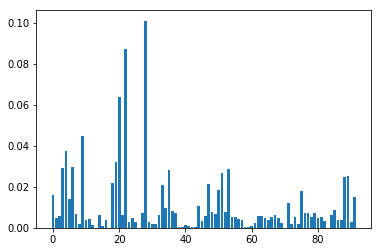

In [195]:
# plot
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()

In [200]:
imp_features = rf.feature_importances_

In [201]:
print(imp_features)

[1.61047613e-02 4.96737078e-03 5.71058696e-03 2.93763511e-02
 3.75547592e-02 1.42486735e-02 2.98693408e-02 6.74951842e-03
 1.99878869e-03 4.47219878e-02 3.93938978e-03 4.50903042e-03
 1.33238322e-03 0.00000000e+00 6.32854188e-03 1.03310745e-03
 3.66150419e-03 9.75376262e-05 2.18783945e-02 3.20484757e-02
 6.40414567e-02 6.06865185e-03 8.71923868e-02 2.83885349e-03
 4.57155977e-03 2.78027706e-03 0.00000000e+00 7.08365600e-03
 1.01091108e-01 2.64387825e-03 1.86430885e-03 2.01871050e-03
 6.23002466e-03 2.07474811e-02 9.75364478e-03 2.81961588e-02
 8.12311055e-03 7.32721031e-03 1.86920302e-04 4.92616342e-04
 1.34818064e-03 7.73582745e-04 4.11708073e-04 2.50229236e-04
 1.05872603e-02 3.49516209e-03 5.69666984e-03 2.14145189e-02
 7.61804233e-03 6.88421644e-03 1.83311455e-02 2.67953920e-02
 7.61715859e-03 2.87573645e-02 5.15733286e-03 5.25490900e-03
 4.31848126e-03 3.72123706e-03 6.31647696e-04 5.30214776e-04
 6.90465643e-04 2.28529205e-03 5.54755418e-03 5.62440790e-03
 4.91828367e-03 4.024902

In [199]:
imp_features.transpose()

array([1.61047613e-02, 4.96737078e-03, 5.71058696e-03, 2.93763511e-02,
       3.75547592e-02, 1.42486735e-02, 2.98693408e-02, 6.74951842e-03,
       1.99878869e-03, 4.47219878e-02, 3.93938978e-03, 4.50903042e-03,
       1.33238322e-03, 0.00000000e+00, 6.32854188e-03, 1.03310745e-03,
       3.66150419e-03, 9.75376262e-05, 2.18783945e-02, 3.20484757e-02,
       6.40414567e-02, 6.06865185e-03, 8.71923868e-02, 2.83885349e-03,
       4.57155977e-03, 2.78027706e-03, 0.00000000e+00, 7.08365600e-03,
       1.01091108e-01, 2.64387825e-03, 1.86430885e-03, 2.01871050e-03,
       6.23002466e-03, 2.07474811e-02, 9.75364478e-03, 2.81961588e-02,
       8.12311055e-03, 7.32721031e-03, 1.86920302e-04, 4.92616342e-04,
       1.34818064e-03, 7.73582745e-04, 4.11708073e-04, 2.50229236e-04,
       1.05872603e-02, 3.49516209e-03, 5.69666984e-03, 2.14145189e-02,
       7.61804233e-03, 6.88421644e-03, 1.83311455e-02, 2.67953920e-02,
       7.61715859e-03, 2.87573645e-02, 5.15733286e-03, 5.25490900e-03,
      

In [202]:
print(len(imp_features))

92


In [203]:
len(X_train.columns)

92

In [204]:
colft = X_train.columns

In [210]:
imp_features.shape

(92,)

In [ ]:
imp_features.reshape()

In [215]:
colr = "Importance"

In [219]:
imp_ft_dat = pd.DataFrame(data = imp_features, index = colft)

In [220]:
imp_ft_dat.head()

,0
arpu_8,0.016105
onnet_mou_8,0.004967
offnet_mou_8,0.005711
roam_ic_mou_8,0.029376
roam_og_mou_8,0.037555


In [222]:
imp_ft_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, arpu_8 to last_day_rch_amt_ch
Data columns (total 1 columns):
0    92 non-null float64
dtypes: float64(1)
memory usage: 3.9+ KB


In [ ]:
imp_ft_dat.rename()

In [223]:
imp_ft_dat.sort_values(by = 0, ascending = False, inplace = True)

In [225]:
# Highlighting top 15 features
imp_ft_dat.head(15)

,0
total_ic_mou_8,0.101091
loc_ic_mou_8,0.087192
loc_ic_t2m_mou_8,0.064041
loc_og_mou_8,0.044722
roam_og_mou_8,0.037555
loc_ic_t2t_mou_8,0.032048
loc_og_t2m_mou_8,0.029869
roam_ic_mou_8,0.029376
total_rech_amt_ch,0.028757
last_day_rch_amt_8,0.028196


Shown above are the key KPIs that operator needs to focus on to improve for the subscribers that have churned or show tendancy to churn. 
Featues like, total_ic_mou, loc_ic_mou, total_rech_amt_ch, loc_og_mo, arpu_chu, total_og_mou, clearly show that the churners or potential churners tend to have lower values for above mentioned features. The features include, the derived 'change' features as well which are difference between the good phase KPIs and action phase and shown by plot analysis previously in the EDA part, these KPIs are lower in the action phase than in the action phase for churners. Also, these KPIs being lower mean that subscriber is not happy with the network quality (dropped calls, network being busy), or, not spending on services (alured by better or cheaper services from competitor).
Suggestions:
1. Improve the quality of network in the circle consisting of these subscribers
2. Identify services subscribers may be interested in that may not be part of portfolio but are being offered by competitors
3. Discuss more cost effective and valuable plans with high value customers so that they are satisfied by services and their ARPU does not decrease